In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"F:\LPU\Code\Python\templates\cleaned_campaign_performance.xlsx")

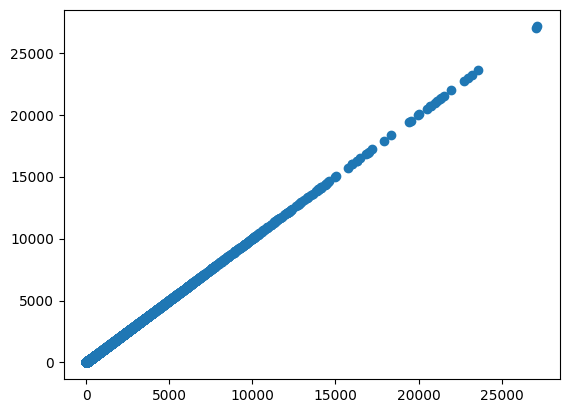

In [3]:
plt.scatter(df['total_spent'], df['total_spent'])

In [4]:
df.isnull().sum()

dates                     0
campaign_name             0
campaign_start_date     586
creative_name             0
total_spent               0
impressions               0
clicks                    0
click_through_rate       37
leads                     0
platform                  0
adset_name             4247
dtype: int64

In [5]:
df.head()

,dates,campaign_name,campaign_start_date,creative_name,total_spent,impressions,clicks,click_through_rate,leads,platform,adset_name
0,2024-04-29,USP_Search_APTNTSKA_250124,2024-01-25,--,6766.15,1250,220,0.176000,25.0,Google,GMAT/GRE
1,2024-05-02,USP_2_Lead-gen-2_Top4-states_050424,2024-04-05,#7 ( Graphic ) - Get A Free Pass,946.38,3154,9,0.285352,1.0,Facebook,USP-2_KA_TN_050424
2,2024-05-02,USP_2_Lead-gen-2_Top4-states_050424,2024-04-05,USP_S3_never-been-easier,170.40,2695,8,0.296846,0.0,Facebook,USP-2_KA_TN_050424
3,2024-05-02,USP_2_Lead-gen-2_Top4-states_050424,2024-04-05,USP_S4_Do-you-have,55.65,577,2,0.346620,0.0,Facebook,USP-2_KA_TN_050424
4,2024-05-02,USP_2_Lead-gen-2_Top4-states_050424,2024-04-05,USP_S1_We-guarantee,296.94,1466,10,0.682128,1.0,Facebook,USP-2_AP_TS_050424


In [6]:
grouped_df = df.groupby('campaign_name')['total_spent'].sum().reset_index()
sorted_df = grouped_df.sort_values(by='total_spent', ascending=False)
top_5_campaigns = sorted_df.head(10)
print(top_5_campaigns)

                                        campaign_name  total_spent
9                     USP Study Abroad_Generic_240224   2126684.24
35                     US_Pathway_2_Lead_gen_1_091123   1884063.88
37                     US_Pathway_2_Lead_gen_3_241123   1749087.89
13                      USP_MS + Coop Campaign_240224   1501040.54
36                     US_Pathway_2_Lead_gen_2_091123   1469168.59
14        USP_Marketing+MBA_New Leads Campaign_240224   1125425.52
24                         USP_Search_APTNTSKA_250124    789571.12
34                                 USP_Webinar_070324    752657.01
10                            USP_2_Lead-gen-1_220124    484768.66
3   CBO - USP Masterclass Cold [ 23rd Nov ] - More...    254353.16


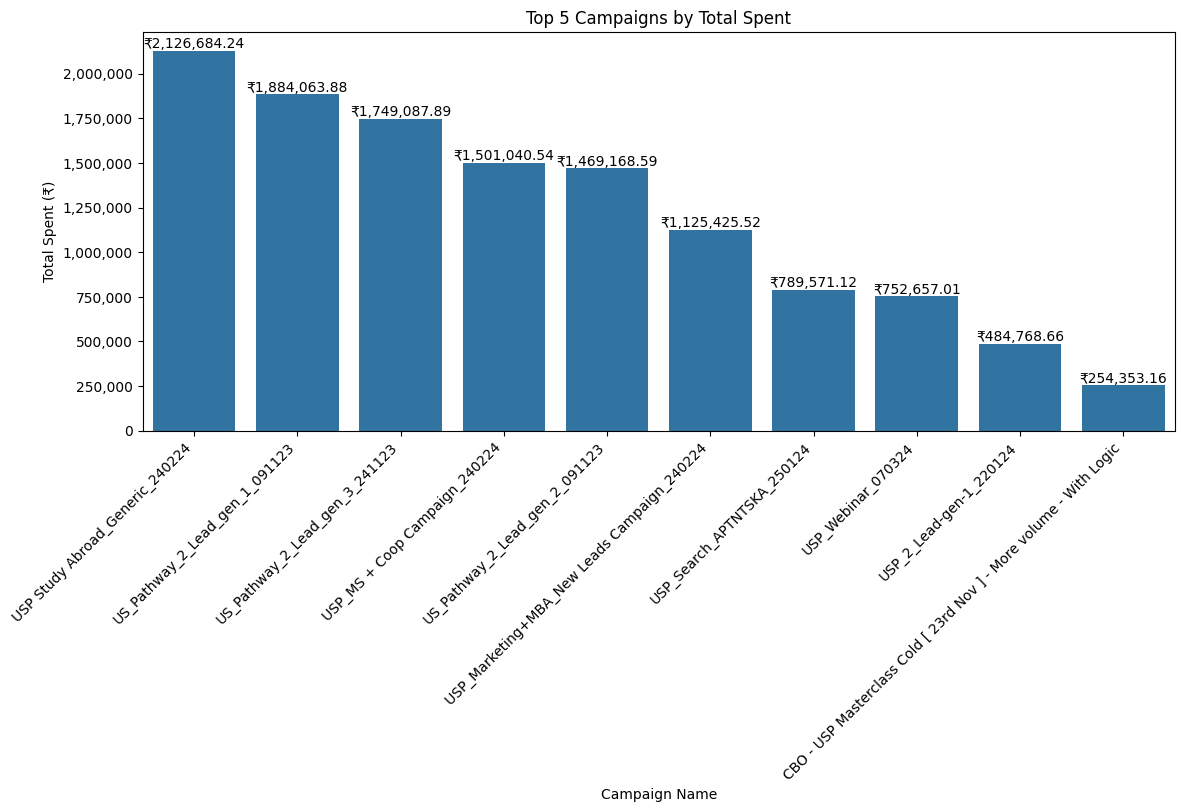

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='campaign_name', y='total_spent', data=top_5_campaigns)
plt.xticks(rotation=45, ha='right')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))

for i, v in enumerate(top_5_campaigns['total_spent']):
    ax.text(i, v, f'₹{v:,.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.xlabel('Campaign Name')
plt.ylabel('Total Spent (₹)')
plt.title('Top 5 Campaigns by Total Spent')

plt.show()

In [8]:
df.loc[df['creative_name'] == ' --', 'creative_name'] = 'NA'

In [9]:
grouped_df = df.groupby('creative_name')['impressions'].sum().reset_index()
sorted_df = grouped_df.sort_values(by='impressions', ascending=False)
top_5_creative_names = sorted_df.head(10)
print(top_5_creative_names)

                                     creative_name  impressions
18   #6 ( Graphic ) - Master's Degree In 12 Months     13136508
141                     USP_kavita&steffi_VideoAd6     10704343
72         USP_Program_Linkedin_Static_C11_SB-3YWP      3336204
108                              USP_RIT_1_Getpaid      2893946
68                         USP_Influencer_videoAd2      2272402
34                                    Influencer 2      2006305
41                                          Shreya      1749289
131                    USP_Webinar_MSunder12Months      1681840
75     USP_Program_Linkedin_Static_C14_Bridge-3YWP      1548740
107                       USP_RG_webinar_V4_Namita      1514965


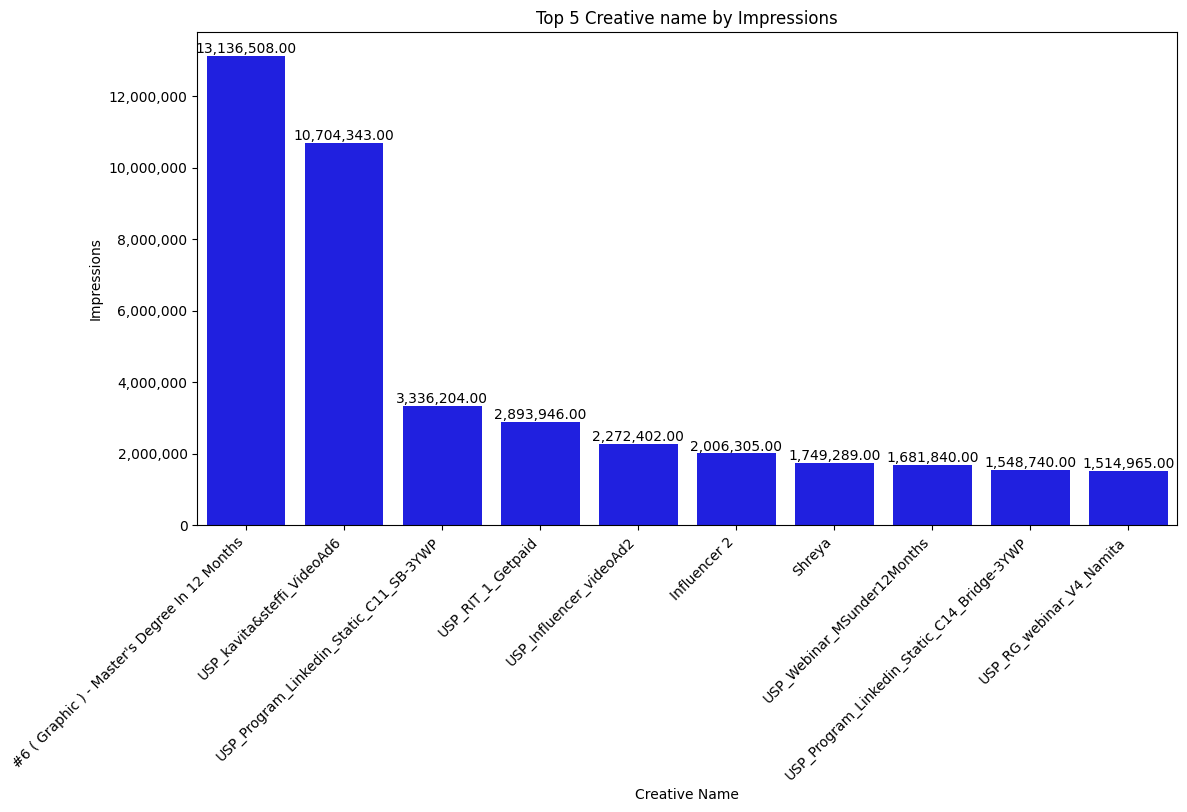

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='creative_name', y='impressions', data=top_5_creative_names, color='blue')
plt.xticks(rotation=45, ha='right')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))
for i, v in enumerate(top_5_creative_names['impressions']):
    ax.text(i, v, f'{v:,.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.xlabel('Creative Name')
plt.ylabel('Impressions')
plt.title('Top 5 Creative name by Impressions')

plt.show()

In [11]:
total_leads_of_campaigns = df.groupby('campaign_name')['leads'].sum().reset_index()
total_clicks_of_campaigns = df.groupby('campaign_name')['clicks'].sum().reset_index()
total_spent_of_campaigns = df.groupby('campaign_name')['total_spent'].sum().reset_index()
total_impressions_of_campaigns = df.groupby('campaign_name')['impressions'].sum().reset_index()

conversion_data = pd.merge(total_impressions_of_campaigns, pd.merge(total_spent_of_campaigns, pd.merge(total_leads_of_campaigns, total_clicks_of_campaigns, on='campaign_name'), on='campaign_name'), on='campaign_name')
conversion_data['conversion_rate'] = (conversion_data['leads'] / conversion_data['clicks']) * 100

In [12]:
conversion_data.head()

,campaign_name,impressions,total_spent,leads,clicks,conversion_rate
0,CBO - USP Masterclass Cold [ 15th Dec ] - High...,610938,186700.48,1346.0,12853,10.472263
1,CBO - USP Masterclass Cold [ 15th Dec ] - More...,1302917,136833.11,654.0,5505,11.880109
2,CBO - USP Masterclass Cold [ 23rd Nov ] - High...,862724,196255.37,1093.0,9469,11.542930
3,CBO - USP Masterclass Cold [ 23rd Nov ] - More...,868290,254353.16,731.0,11100,6.585586
4,USP Masterclass Cold [ 14th Dec ] - Link Click Ad,871201,10452.55,0.0,18578,0.000000


In [13]:
conversion_data[conversion_data['campaign_name'] == 'USP_Marketing+MBA_New Leads Campaign_240224']


,campaign_name,impressions,total_spent,leads,clicks,conversion_rate
14,USP_Marketing+MBA_New Leads Campaign_240224,8106285,1125425.52,2390.0,37727,6.334986


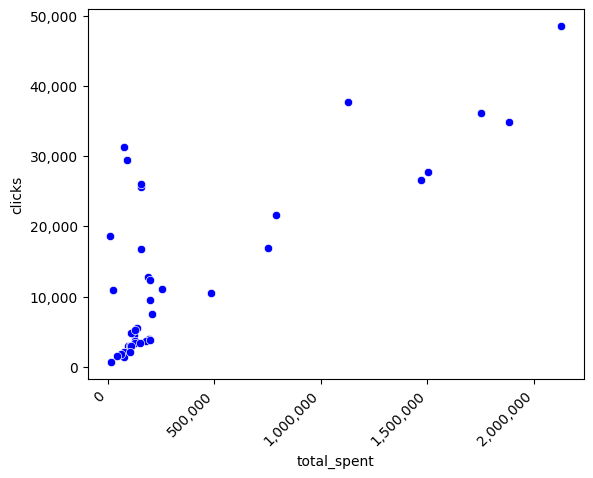

In [14]:
# plt.scatter(conversion_data['total_spent'], conversion_data['conversion_rate'])

ax = sns.scatterplot(x='total_spent', y='clicks', data=conversion_data, color='blue')

plt.xticks(rotation=45, ha='right')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))

In [15]:
####################################
cost_per_lead = df['total_spent'].sum() / (df['leads'].sum())
print(f"How much it costs to aquire 1 lead : {cost_per_lead}")

How much it costs to aquire 1 lead : 464.96052896783175


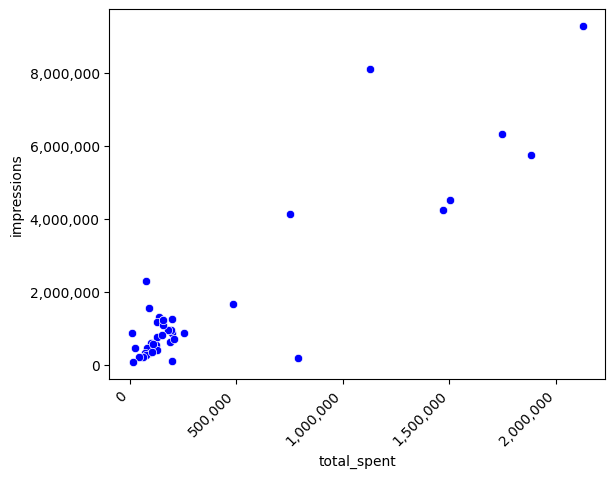

In [16]:
ax = sns.scatterplot(x='total_spent', y='impressions', data=conversion_data, color='blue')

plt.xticks(rotation=45, ha='right')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))

In [17]:
conversion_data[(conversion_data['total_spent'] < 500000) & (conversion_data['clicks'] > 20000)]

,campaign_name,impressions,total_spent,leads,clicks,conversion_rate
27,USP_Video_APTLTSKA_Lead-Gen_160224,1546844,89981.07,155.98,29492,0.528889
28,USP_Video_APTLTSKA_Lead-Gen_Custom-intent_050324,1220168,155920.03,630.55,25558,2.467134
30,USP_Video_APTLTSKA_Lead-Gen_Websites_050324,1226818,155646.87,569.17,26065,2.183656
31,USP_Video_India_EX-APTLTSKA_Lead-Gen_160224,2302262,76059.42,82.00,31294,0.262031


In [18]:
print(df[df['campaign_name'] == 'USP_Video_APTLTSKA_Lead-Gen_160224']['platform'].unique())
print(df[df['campaign_name'] == 'USP_Video_APTLTSKA_Lead-Gen_Custom-intent_050324']['platform'].unique())
print(df[df['campaign_name'] == 'USP_Video_APTLTSKA_Lead-Gen_Websites_050324']['platform'].unique())
print(df[df['campaign_name'] == 'USP_Video_India_EX-APTLTSKA_Lead-Gen_160224']['platform'].unique())

['Google']
['Google']
['Google']
['Google']


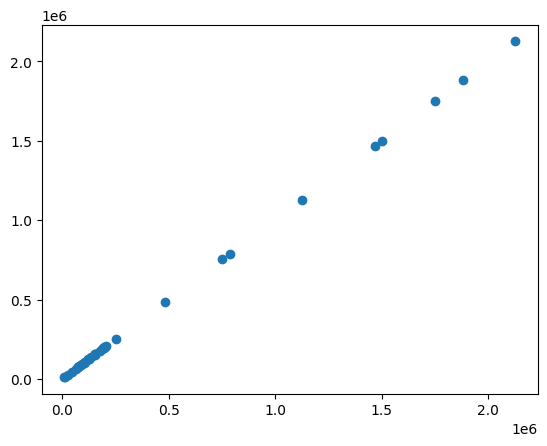

In [19]:
plt.scatter(conversion_data['total_spent'],conversion_data['total_spent'])

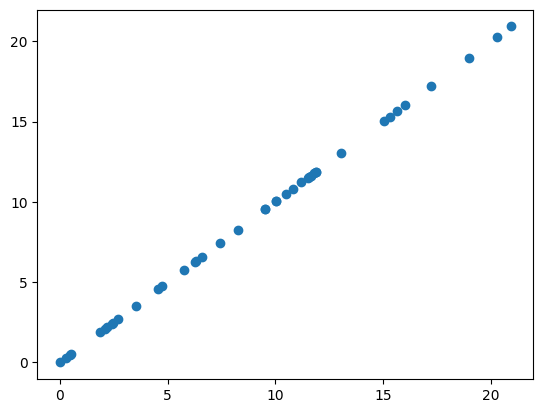

In [20]:
plt.scatter(conversion_data['conversion_rate'], conversion_data['conversion_rate'])

In [21]:
from scipy.stats import pearsonr, spearmanr

pearson_corr, _ = pearsonr(conversion_data['total_spent'], conversion_data['conversion_rate'])
spearman_corr, _ = spearmanr(conversion_data['total_spent'], conversion_data['conversion_rate'])

print(f"Pearson Correlation: {pearson_corr}")
print(f"Spearman Correlation: {spearman_corr}")

Pearson Correlation: -0.12042238244712224
Spearman Correlation: -0.01358885017421603


In [22]:
conversion_data = conversion_data.sort_values(by='conversion_rate', ascending=False)
top_5_conversion_data = conversion_data.head(10)

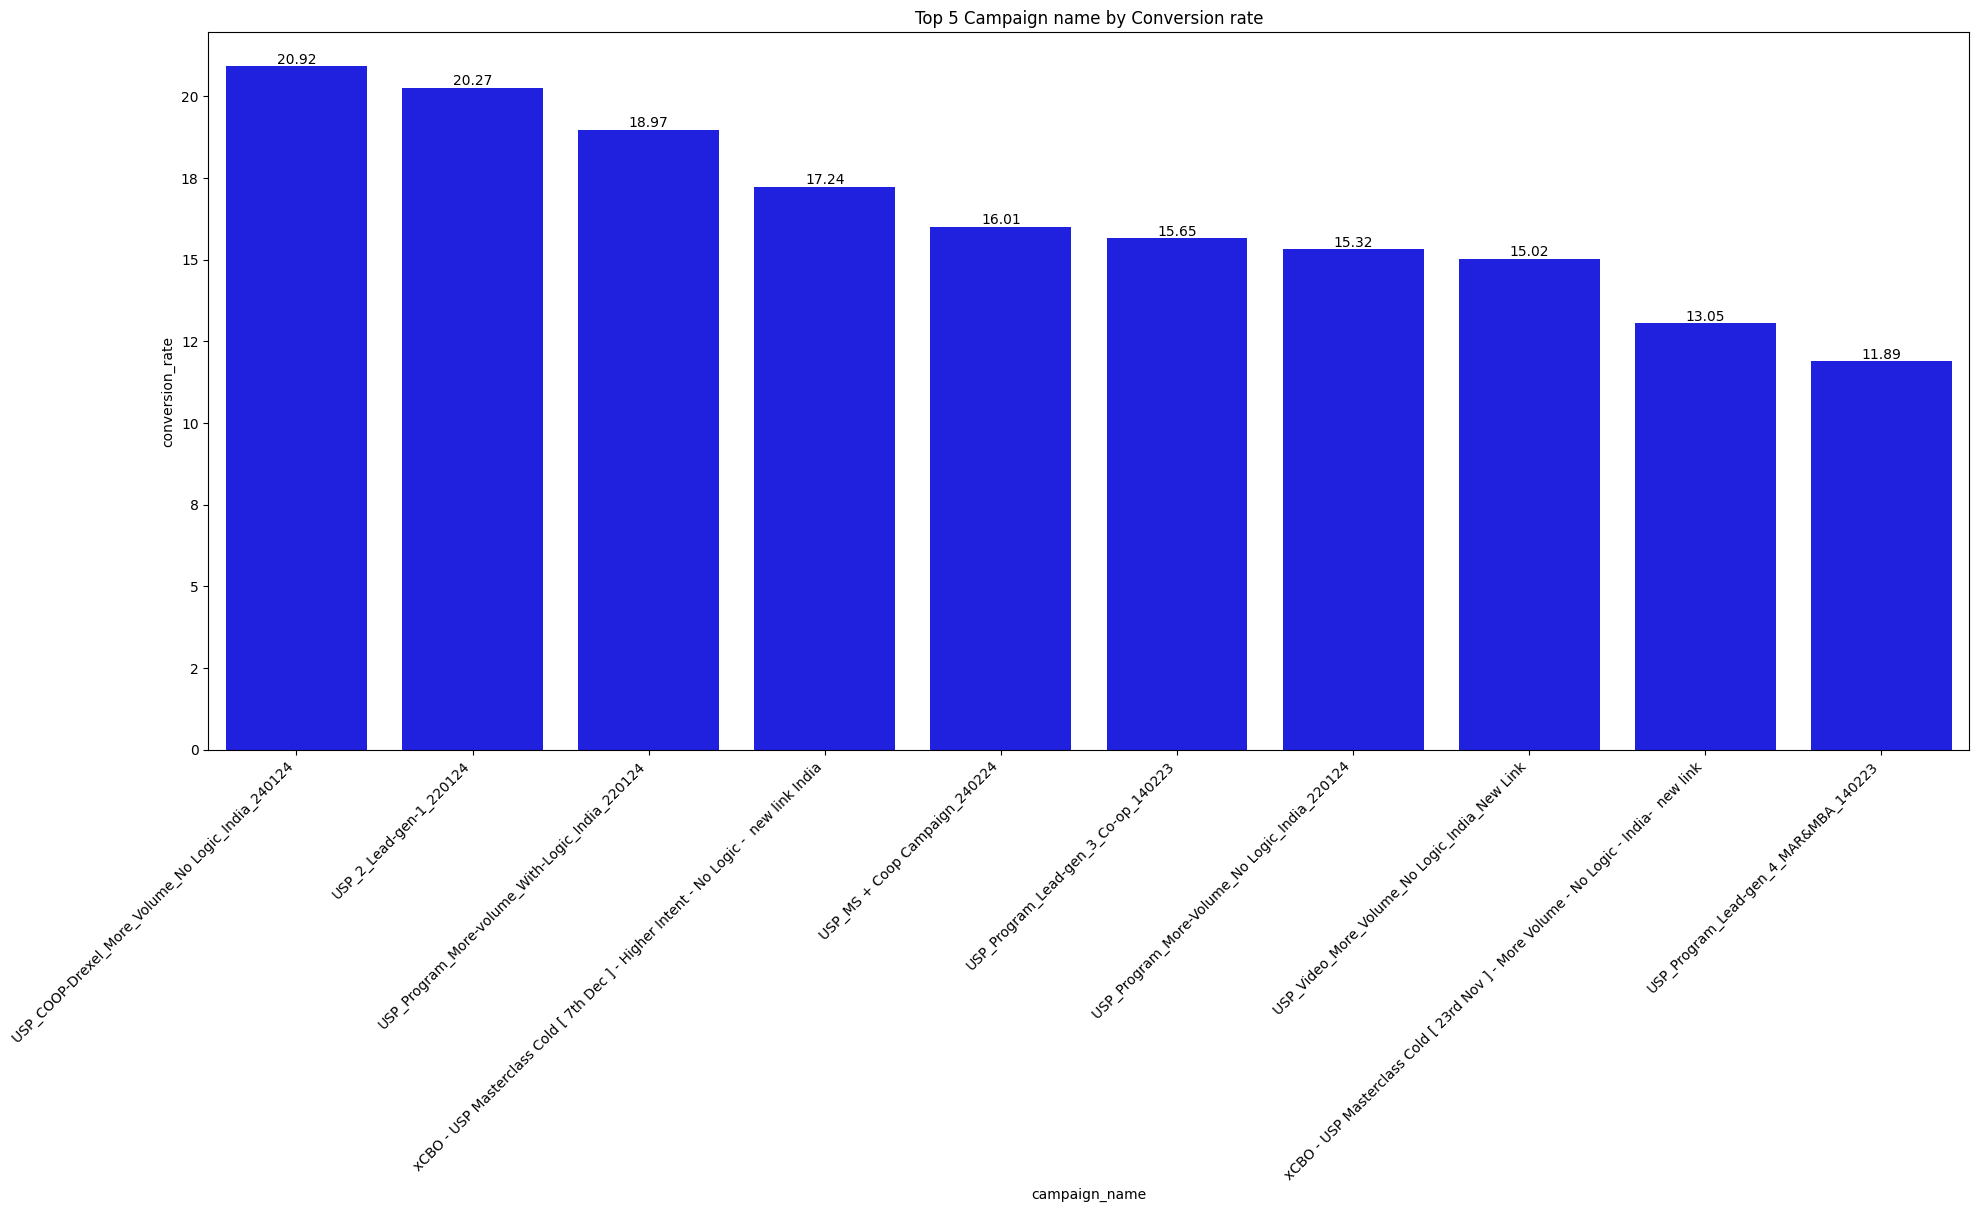

In [23]:
plt.figure(figsize=(20, 12))
ax = sns.barplot(x='campaign_name', y='conversion_rate', data=top_5_conversion_data, color='blue')
plt.xticks(rotation=45, ha='right')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))
for i, v in enumerate(top_5_conversion_data['conversion_rate']):
    ax.text(i, v, f'{v:,.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.xlabel('campaign_name')
plt.ylabel('conversion_rate')
plt.title('Top 5 Campaign name by Conversion rate')
plt.show()

In [24]:
cthrough_plaform = df.groupby('platform')['click_through_rate'].sum().reset_index()
cthrough_platform = cthrough_plaform.sort_values(by='click_through_rate', ascending=False)
d = {}

for x in cthrough_platform.values:
    ln = len(df[df['platform'] == x[0]])
    x[1] /= ln
    d[x[0]] = x[1]

In [25]:
print(d)

{'Facebook': 1.4048379680246492, 'Google': 0.040446367239101715, 'LinkedIn': 0.006811043089239463}


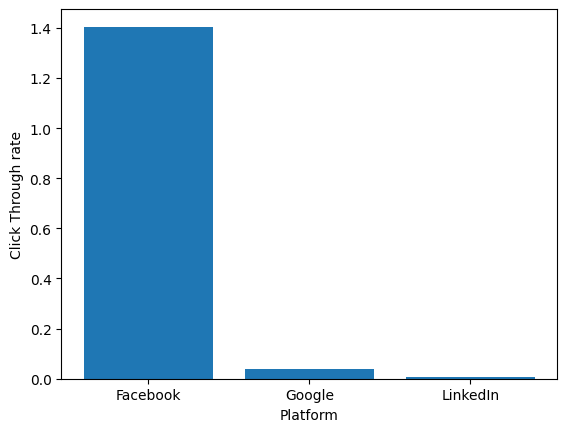

In [26]:
plt.bar(x=d.keys(), height=d.values())
plt.xlabel('Platform')
plt.ylabel('Click Through rate')

plt.show()

In [27]:
df.head()

,dates,campaign_name,campaign_start_date,creative_name,total_spent,impressions,clicks,click_through_rate,leads,platform,adset_name
0,2024-04-29,USP_Search_APTNTSKA_250124,2024-01-25,NA,6766.15,1250,220,0.176000,25.0,Google,GMAT/GRE
1,2024-05-02,USP_2_Lead-gen-2_Top4-states_050424,2024-04-05,#7 ( Graphic ) - Get A Free Pass,946.38,3154,9,0.285352,1.0,Facebook,USP-2_KA_TN_050424
2,2024-05-02,USP_2_Lead-gen-2_Top4-states_050424,2024-04-05,USP_S3_never-been-easier,170.40,2695,8,0.296846,0.0,Facebook,USP-2_KA_TN_050424
3,2024-05-02,USP_2_Lead-gen-2_Top4-states_050424,2024-04-05,USP_S4_Do-you-have,55.65,577,2,0.346620,0.0,Facebook,USP-2_KA_TN_050424
4,2024-05-02,USP_2_Lead-gen-2_Top4-states_050424,2024-04-05,USP_S1_We-guarantee,296.94,1466,10,0.682128,1.0,Facebook,USP-2_AP_TS_050424


In [28]:
date_imp = pd.DataFrame(df.groupby('campaign_start_date')['impressions'].sum())
date_imp = date_imp.sort_values(by='campaign_start_date', ascending=True)
print(date_imp)

                     impressions
campaign_start_date             
2023-02-14               1045290
2023-10-31               1576856
2023-11-09               9977019
2023-11-23               2453549
2023-11-24               6317435
2023-12-07                 62852
2023-12-14                871201
2023-12-15               1913855
2024-01-22               4172198
2024-01-24               2089969
2024-01-25                267444
2024-02-16               3849106
2024-02-24              21878215
2024-03-05               3535965
2024-03-07               4125312
2024-03-11                442455
2024-03-22                348534
2024-03-27                806006
2024-04-05                960204


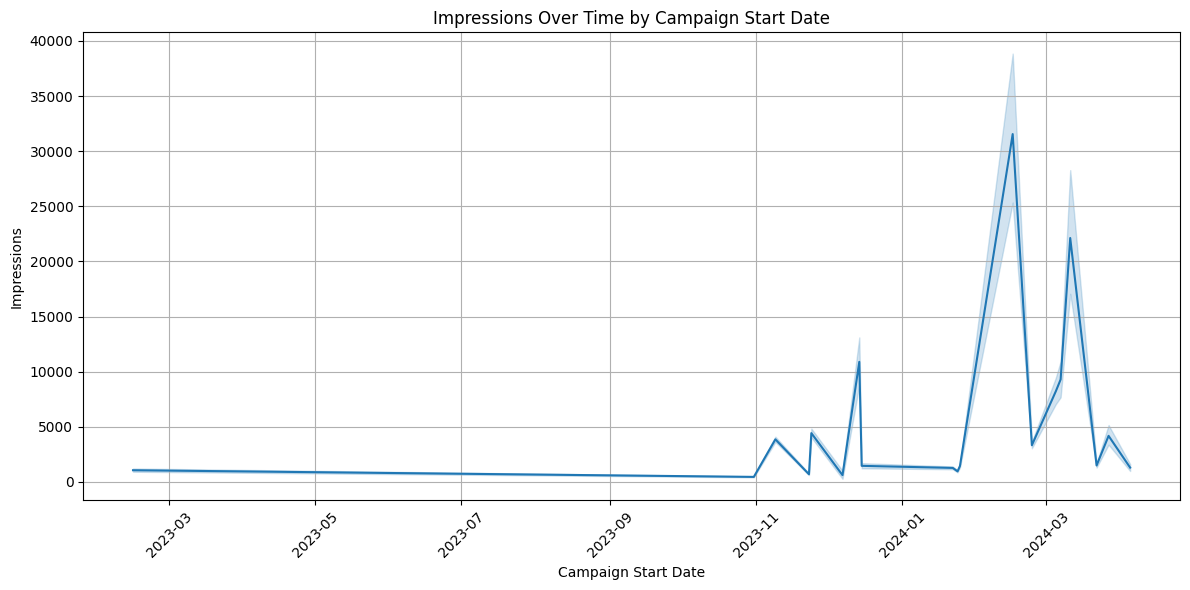

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='campaign_start_date', y='impressions', data=df)
plt.title('Impressions Over Time by Campaign Start Date')
plt.xlabel('Campaign Start Date')
plt.ylabel('Impressions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

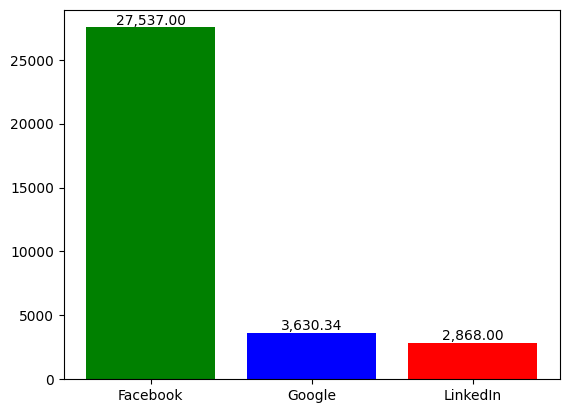

In [30]:
plat_lead = df.groupby('platform')['leads'].sum().reset_index()


plt.bar(plat_lead['platform'], plat_lead['leads'], color=['green', 'blue', 'red'])

for i, v in enumerate(plat_lead['leads']):
    plt.text(i, v, f'{v:,.2f}', ha='center', va='bottom')
plt.show()

# Next

In [31]:
df = pd.DataFrame(pd.read_excel(r"F:\LPU\Code\Python\templates\new_df.xlsx"))
pd.set_option('display.max_columns', None)
df.sample(5)

,lead_number,first_name,Lead Id,inbound_phone_call_counter,outbound_phone_call_counter,lead_stage,lead_score,owner,activity,date_of_call,status,call_duration_sec,calls_done_by,contacted_x,call_time,sales_squad,squad_role,lead_id,created_time,Ad Name,Campaign Name,form_name,platform,graduation_degree,graduation_percentage,work_experience,mapped,contacted_y,lsq_lead_stage,lsq_lead_owner,lsq_source,derived_score
56378,2593194,Mukesh,l:1561316501076650,0,20,New Enquiry,0,Arabinda Palai,Outbound Phone Call Activity,2024-04-21 12:17:00,NotAnswered,30,ArabindaPalai,NaN,2024-04-21 12:17:00,NaN,NaN,l:1561316501076650,2024-03-22 22:03:00,USP_RIT_1_Getpaid,USP_MS + Coop Campaign_240224,BM - US pathway Webinar Form - Higher Intent -...,Facebook,Others,60.0,0.0,Mapped,Contacted,Never Picked up,Arabinda Palai,Zoom Webinar,0.75
180858,224760,Ankit,298e15c0-3927-43ed-a518-deb241a44ede-3,0,10,Token Amount,6,Vibhav Walia,Outbound Phone Call Activity,2023-12-16 12:48:00,NotAnswered,30,VibhavWalia,NaN,2023-12-16 12:48:00,Squad 3,TL,298e15c0-3927-43ed-a518-deb241a44ede-3,2023-11-20 17:28:00,USP_Program_Linkedin_Static_C9_Avg-Salary,US_Pathway_2_Lead_gen_1_091123,US Pathway Program final Form 110923,LinkedIn,"B.Tech (Civil, EEE, Mech. , etc.)",75.0,1.0,Mapped,Contacted,Counselling Done,Saket Rai,LinkedIn,2.25
4303,2268371,Jishan Yamani,09b965f0-d7ce-4a40-9be0-eb33eb72d650-6,0,20,Never Picked up,0,Aditya VijayÂ Singh,Outbound Phone Call Activity,2024-05-02 14:37:00,NotAnswered,30,payaldhiman,NaN,2024-05-02 14:37:00,NaN,NaN,09b965f0-d7ce-4a40-9be0-eb33eb72d650-6,2024-01-24 11:49:00,USP_Program_Linkedin_Static_C11_SB-3YWP,US_Pathway_2_Lead_gen_1_091123,US Pathway Program final Form 110923,LinkedIn,B.Tech IT,75.0,1.0,Mapped,Contacted,Never Picked up,Aditya Vijay Singh,LinkedIn,0.00
111385,2169763,Vikas,l:930932801875286,0,20,Document Collection,0,Swapnil Awasthi,Outbound Phone Call Activity,2024-04-20 18:57:00,Answered,541,DiptikantaJena,NaN,2024-04-20 18:57:00,Squad 1,TL,l:930932801875286,2024-01-13 09:09:00,#6 ( Graphic ) - Master's Degree In 12 Months,CBO - USP Masterclass Cold [ 15th Dec ] - High...,BM - US pathway Webinar Form - Higher Intent -...,Facebook,Others,65.0,13.0,Mapped,Contacted,Document Collection,Swapnil Awasthi,Facebook,2.75
152256,857649,Badri Narayanan Venkatesan,l:317963037659650,1,0,Not Interested,4,Prapti Lohan,Inbound Phone Call Activity,2024-02-10 12:36:00,Answered,34,PraptiLohan,NaN,2024-02-10 12:36:00,Squad 2,Agent,l:317963037659650,2023-11-28 11:22:00,#6 ( Graphic ) - Master's Degree In 12 Months,USP Masterclass Cold [ 31st Oct ] - More Volum...,BM - US pathway Webinar Form - More Volume - N...,Facebook,"B.Tech (Civil, EEE, Mech. , etc.)",65.0,5.0,Mapped,Contacted,Not Interested,Prapti Lohan,Facebook,0.00


<BarContainer object of 3 artists>

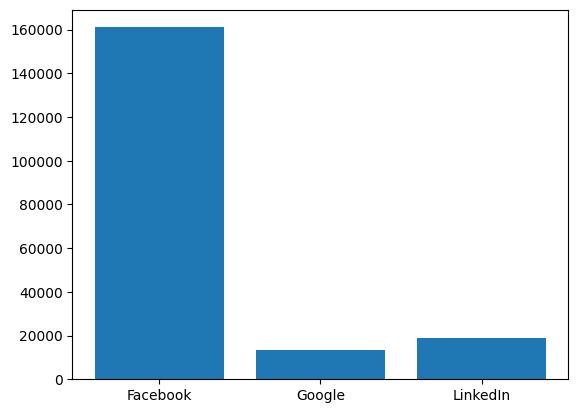

In [32]:
plat_lead = df.groupby('platform')['Lead Id'].count().reset_index()
plt.bar(x=plat_lead['platform'], height=plat_lead['Lead Id'])

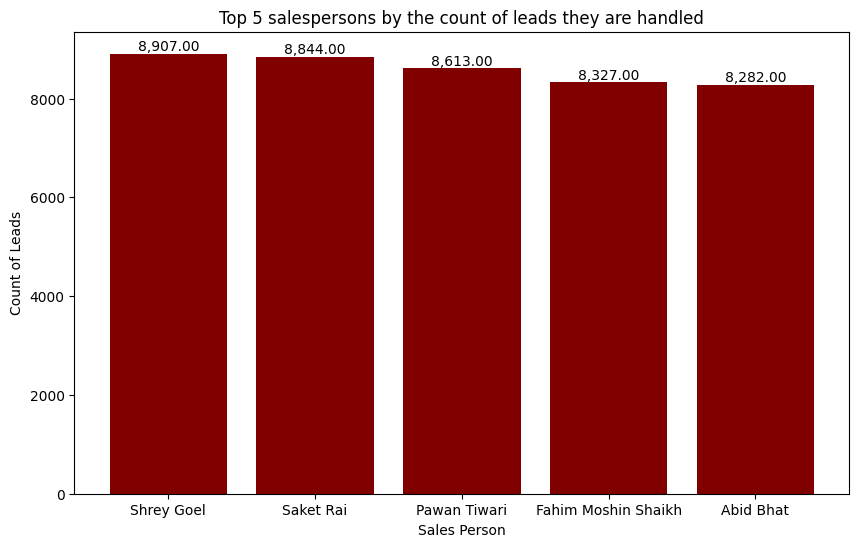

In [33]:
owner_leads = (df.groupby('owner')['Lead Id'].count().reset_index()).sort_values(by='Lead Id', ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.bar(x=owner_leads['owner'], height=owner_leads['Lead Id'], color='maroon')
for i, v in enumerate(owner_leads['Lead Id']):
    plt.text(i, v, f'{v:,.2f}', ha='center', va='bottom')

plt.xlabel('Sales Person')
plt.ylabel('Count of Leads')
plt.title('Top 5 salespersons by the count of leads they are handled')
plt.show()

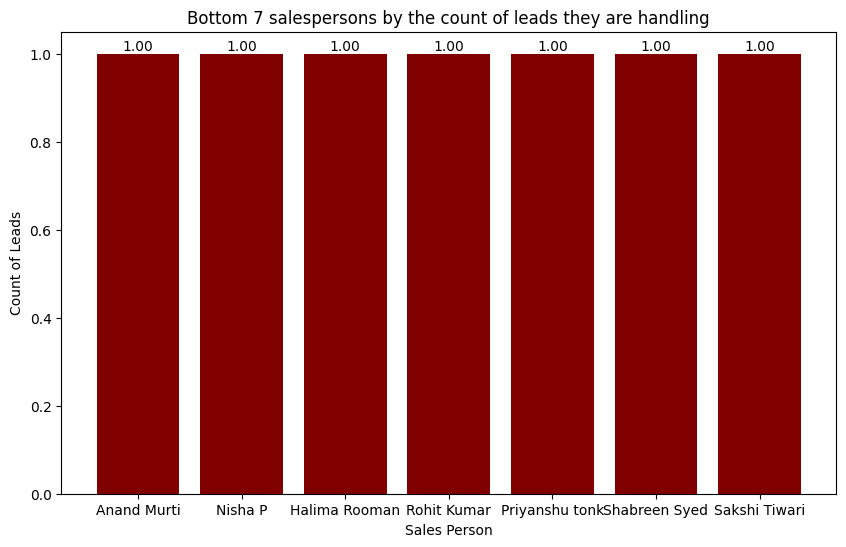

In [34]:
owner_leads = (df.groupby('owner')['Lead Id'].count().reset_index()).sort_values(by='Lead Id', ascending=False).tail(7)

plt.figure(figsize=(10, 6))
plt.bar(x=owner_leads['owner'], height=owner_leads['Lead Id'], color='maroon')
for i, v in enumerate(owner_leads['Lead Id']):
    plt.text(i, v, f'{v:,.2f}', ha='center', va='bottom')

plt.xlabel('Sales Person')
plt.ylabel('Count of Leads')
plt.title('Bottom 7 salespersons by the count of leads they are handling')
plt.show()

In [35]:
lead_owner_calls = df.groupby(['Lead Id', 'owner'])['outbound_phone_call_counter'].sum().reset_index()
average_calls_per_owner = lead_owner_calls.groupby('owner')['outbound_phone_call_counter'].mean().reset_index()

average_calls_per_owner.columns = ['owner', 'average_outbound_call_counter']
print(average_calls_per_owner)

                   owner  average_outbound_call_counter
0                 Aakash                      40.000000
1            Aarti sagar                      18.000000
2         Abhishek Singh                      52.066667
3              Abid Bhat                      33.408772
4             Adarsh Jha                       9.363636
..                   ...                            ...
82            Upvan Dhar                       7.000000
83  Vaibhav Kumar Sharma                       6.162826
84          Vibhav Walia                      30.074074
85          payal dhiman                      70.367598
86          yashi tiwari                      58.348397

[87 rows x 2 columns]


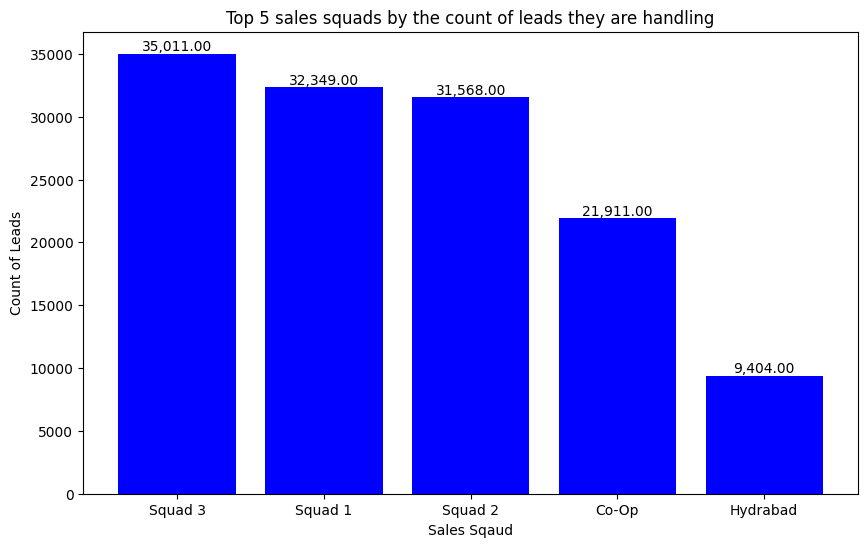

In [36]:
owner_leads = (df.groupby('sales_squad')['Lead Id'].count().reset_index()).sort_values(by='Lead Id', ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.bar(x=owner_leads['sales_squad'], height=owner_leads['Lead Id'], color='blue')
for i, v in enumerate(owner_leads['Lead Id']):
    plt.text(i, v, f'{v:,.2f}', ha='center', va='bottom')

plt.xlabel('Sales Sqaud')
plt.ylabel('Count of Leads')
plt.title('Top 5 sales squads by the count of leads they are handling')
plt.show()

In [37]:
gpl = df.groupby('graduation_percentage')['Lead Id'].count().reset_index().sort_values(by='Lead Id',ascending=False)
print(gpl)

    graduation_percentage  Lead Id
4                    70.0    29773
3                    65.0    27509
0                    50.0    26869
5                    75.0    26697
2                    60.0    23637
6                    80.0    18009
1                    55.0    14269
7                    85.0    12655
8                    90.0     7471
9                    95.0     3620
10                  100.0     2829


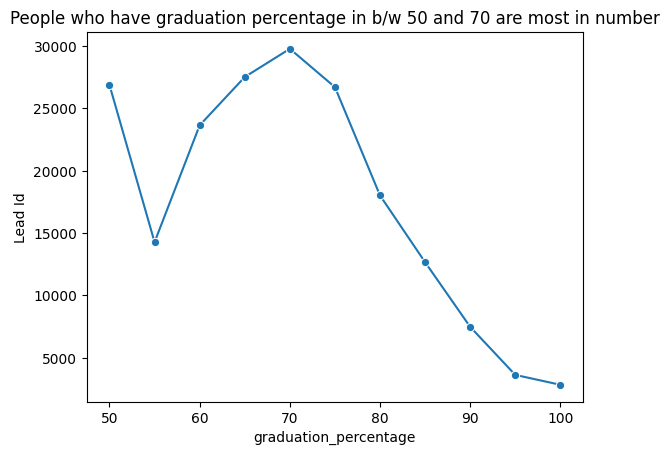

In [38]:
sns.lineplot(x=gpl['graduation_percentage'], y=gpl['Lead Id'], marker='o')
plt.title('People who have graduation percentage in b/w 50 and 70 are most in number')
plt.show()

In [39]:
fs = df[(df['graduation_percentage'] >= 50) & (df['graduation_percentage'] <= 70)]
len(fs)

122057

In [40]:
fs.head(1)

,lead_number,first_name,Lead Id,inbound_phone_call_counter,outbound_phone_call_counter,lead_stage,lead_score,owner,activity,date_of_call,status,call_duration_sec,calls_done_by,contacted_x,call_time,sales_squad,squad_role,lead_id,created_time,Ad Name,Campaign Name,form_name,platform,graduation_degree,graduation_percentage,work_experience,mapped,contacted_y,lsq_lead_stage,lsq_lead_owner,lsq_source,derived_score
0,2704878,Pranav,l:861701659054416,3,0,Token Amount,1,Ratnesh Mishra,Inbound Phone Call Activity,2024-04-16 16:29:00,Answered,232,SuryanshTiwari,NaN,2024-04-16 16:29:00,Squad 3,Agent,l:861701659054416,2024-03-29 05:37:00,USP_Webinar_MSunder12Months,USP_Webinar_070324,BM - US pathway Webinar Form - More Volume - N...,Facebook,Others,60.0,0.0,Mapped,Contacted,Application Submitted,Ratnesh Mishra,Zoom Webinar,2.5


In [41]:
gfs = fs.groupby('derived_score')['Lead Id'].count().reset_index().sort_values(by='Lead Id' ,ascending=False)
gfs

,derived_score,Lead Id
4,0.50,31612
5,0.75,24548
2,0.00,24030
3,0.25,14744
6,1.00,7878
7,1.25,5125
8,1.50,4535
13,2.75,2505
1,-0.25,2226
9,1.75,1385


In [42]:
df.head(1)

,lead_number,first_name,Lead Id,inbound_phone_call_counter,outbound_phone_call_counter,lead_stage,lead_score,owner,activity,date_of_call,status,call_duration_sec,calls_done_by,contacted_x,call_time,sales_squad,squad_role,lead_id,created_time,Ad Name,Campaign Name,form_name,platform,graduation_degree,graduation_percentage,work_experience,mapped,contacted_y,lsq_lead_stage,lsq_lead_owner,lsq_source,derived_score
0,2704878,Pranav,l:861701659054416,3,0,Token Amount,1,Ratnesh Mishra,Inbound Phone Call Activity,2024-04-16 16:29:00,Answered,232,SuryanshTiwari,NaN,2024-04-16 16:29:00,Squad 3,Agent,l:861701659054416,2024-03-29 05:37:00,USP_Webinar_MSunder12Months,USP_Webinar_070324,BM - US pathway Webinar Form - More Volume - N...,Facebook,Others,60.0,0.0,Mapped,Contacted,Application Submitted,Ratnesh Mishra,Zoom Webinar,2.5


### Squad 3 was the most active squad followed by Squad 1 followed by Squad 2

In [43]:
filtered_df = df[df['inbound_phone_call_counter'] != 0]
status_counts = pd.DataFrame(filtered_df.groupby(['calls_done_by', 'status']).size().unstack(fill_value=0).reset_index().sort_values(by='Answered', ascending=False))
print(status_counts)

status       calls_done_by  Answered  Missed
21             PawanTiwari       227     308
34               ShreyGoel       224     224
30                SaketRai       222     302
12      Fahim MoshinShaikh       219     266
22             PraptiLohan       210     273
7               AyushDixit       204     493
26         Rohini RaoDhara       200     159
24           RatneshMishra       199     180
14             JatinLuthra       194     184
9              ChitwanSoni       186     224
0                 AbidBhat       185     296
8        BompadaSai Sudeep       179     267
40          SuryanshTiwari       156     144
44             yashitiwari       155     144
1       AdityaVijayÂ Singh       146     172
13           JanviAggarwal       144     198
36        SiddharthGoswami       140     159
37             SimranSingh       107     268
15                   Kajal        99     196
10          DiptikantaJena        99      44
5            ArabindaPalai        99      95
32        

In [44]:
status_counts

status,calls_done_by,Answered,Missed
21,PawanTiwari,227,308
34,ShreyGoel,224,224
30,SaketRai,222,302
12,Fahim MoshinShaikh,219,266
22,PraptiLohan,210,273
7,AyushDixit,204,493
26,Rohini RaoDhara,200,159
24,RatneshMishra,199,180
14,JatinLuthra,194,184
9,ChitwanSoni,186,224


In [45]:
status_counts['Total'] = status_counts['Answered'] + status_counts['Missed']
status_counts['Answered_Ratio'] = (status_counts['Answered'] / status_counts['Total']) * 100

In [46]:
top_5_cdb = status_counts.sort_values(by='Answered_Ratio', ascending=False).head(5)

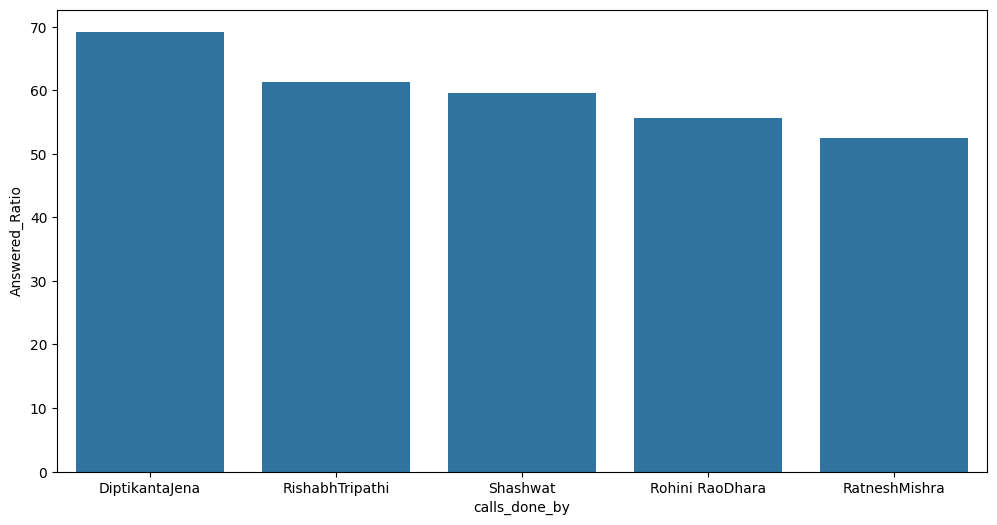

In [47]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_5_cdb['calls_done_by'], y=top_5_cdb['Answered_Ratio'])
plt.show()

In [48]:
df.head(1)

,lead_number,first_name,Lead Id,inbound_phone_call_counter,outbound_phone_call_counter,lead_stage,lead_score,owner,activity,date_of_call,status,call_duration_sec,calls_done_by,contacted_x,call_time,sales_squad,squad_role,lead_id,created_time,Ad Name,Campaign Name,form_name,platform,graduation_degree,graduation_percentage,work_experience,mapped,contacted_y,lsq_lead_stage,lsq_lead_owner,lsq_source,derived_score
0,2704878,Pranav,l:861701659054416,3,0,Token Amount,1,Ratnesh Mishra,Inbound Phone Call Activity,2024-04-16 16:29:00,Answered,232,SuryanshTiwari,NaN,2024-04-16 16:29:00,Squad 3,Agent,l:861701659054416,2024-03-29 05:37:00,USP_Webinar_MSunder12Months,USP_Webinar_070324,BM - US pathway Webinar Form - More Volume - N...,Facebook,Others,60.0,0.0,Mapped,Contacted,Application Submitted,Ratnesh Mishra,Zoom Webinar,2.5


In [49]:
gdp = df.groupby(['graduation_degree','platform']).size().unstack().reset_index()

In [50]:
gdp

platform,graduation_degree,Facebook,Google,LinkedIn
0,B.TECH/BE,NaN,3.0,NaN
1,"B.Tech (Civil, EEE, Mech. , etc.)",39363.0,NaN,8711.0
2,"B.Tech (Civil, ME, ECE, EEE etc.)",NaN,755.0,NaN
3,B.Tech CSE,22634.0,573.0,4931.0
4,B.Tech IT,10306.0,464.0,1809.0
5,M.Tech,6268.0,NaN,1483.0
6,MCA,6934.0,238.0,99.0
7,Others,75560.0,7367.0,1753.0
8,PG,NaN,1255.0,NaN
9,UG,NaN,2835.0,NaN


In [51]:
gg = gdp.melt(id_vars='graduation_degree', value_vars=['Facebook', 'Google', 'LinkedIn'], var_name='graduation degree', value_name='count')


### Count of Graduates based on the platform we got leads from.

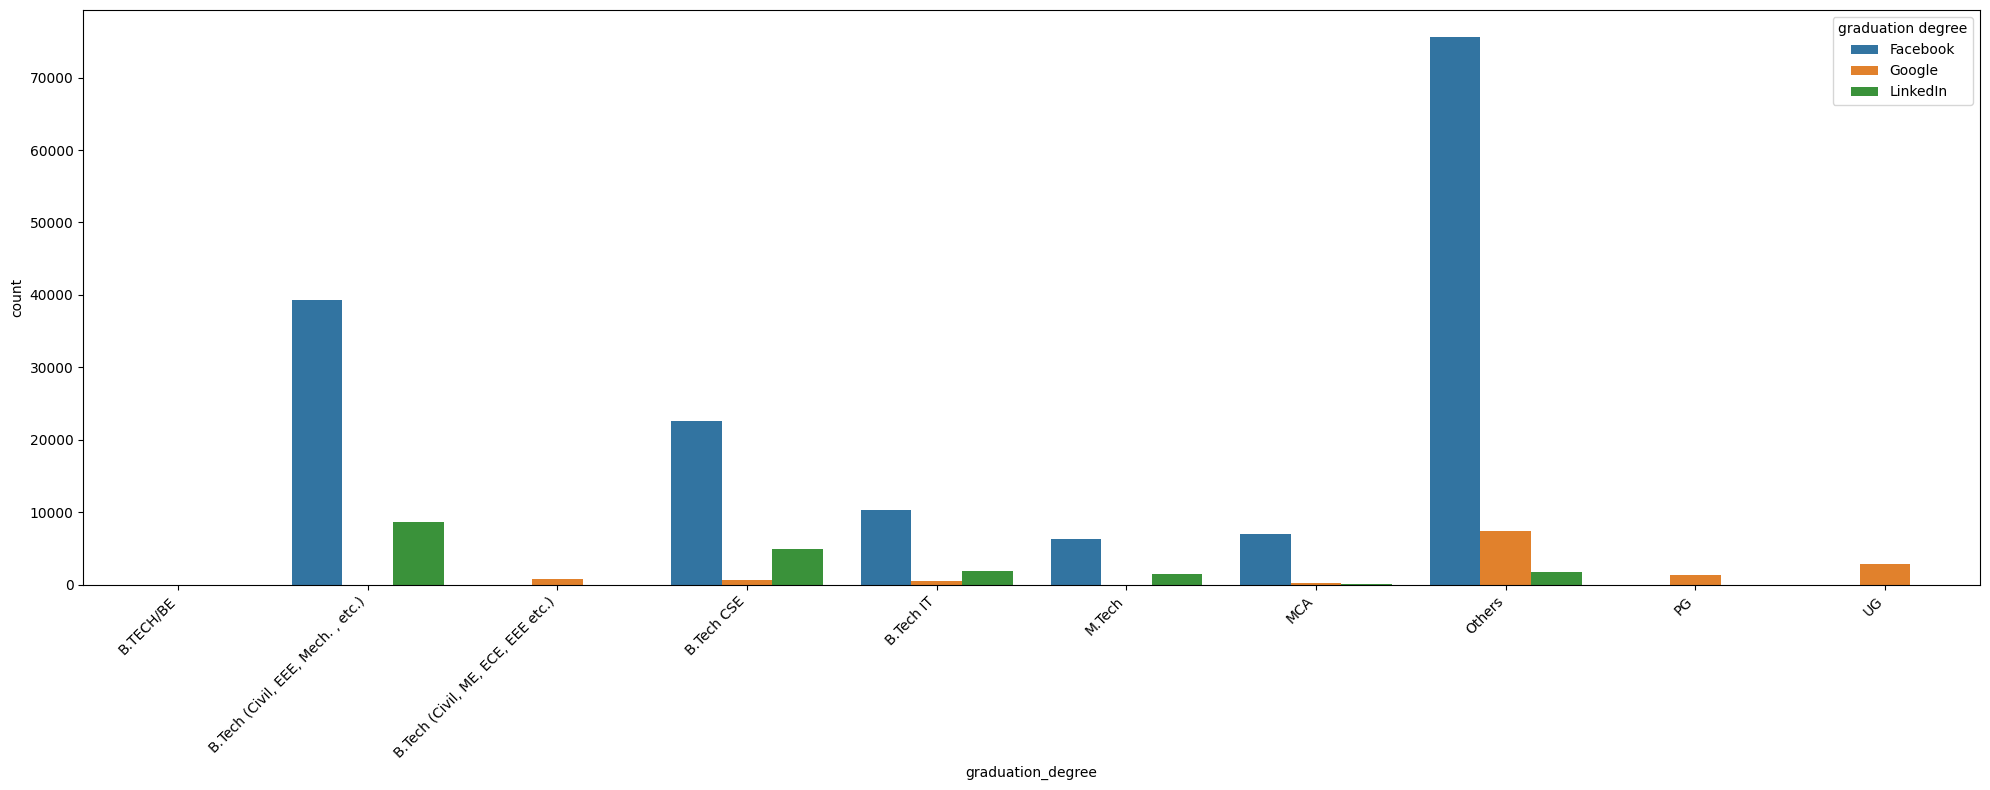

In [52]:
plt.figure(figsize=(20, 8))
sns.barplot(x='graduation_degree', y='count', hue='graduation degree', data=gg)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [53]:
fdf = pd.DataFrame(pd.read_excel(r"F:\LPU\Code\Python\templates\final_leads_beta.xlsx"))
pd.set_option('display.max_columns', None)
fdf.sample(1)

,lead_number,first_name,Lead Id,inbound_phone_call_counter,outbound_phone_call_counter,lead_stage,lead_score,owner,activity,date_of_call,status_x,call_duration_sec,calls_done_by,contacted_x,call_time,sales_squad,squad_role,lead_id,created_time,Ad Name,Campaign Name,form_name,platform,graduation_degree,graduation_percentage,work_experience,mapped,contacted_y,lsq_lead_stage,lsq_lead_owner,lsq_source,derived_score,Name,Lead ID,created_date,paid_date,cohort,source,agent,counsellor,prospect_id,status_y,Candidate Name,Counselor Name,Block Amount Received Date,Univ. Pitched,Candidate Preferred College #1,Candidate Preferred College #2,10th Percentage,12th Percentage,UG - CGPA (out of 10),GPA (Out of 4),PG - CGPA or %,Work Exp.,Highest Education,Designation - Company Name,Candidate Application Status,Candidate Loan Status,Remarks - General,Reason for dropping,"If dropped, mention stage of the application",,KYC & Acad Documents Received,Tech Exam Scores,Coding Test Score,English Exam Scores,Exam Taking Date,English Interview Score (15),Tech. interview Score (10),.1,Application Type,Intake Status,.2,Choice of School #1,Choice of Program #1,Passport #1,Resume #1,Degree #1,Transcript #1,Application Fee #1,LOR #1,SOP #1,Pending Stage #1,Application Status #1,Application Initation Date #1,App Partially Submitted Date #1,Application Submission Date #1,Offer Letter #1,Offer Letter Provision Date #1,Deposit #1,Deposit Date Paid #1,.3,Choice of School #2,Choice of Program #2,Application Fee #2,LOR #2,SOP #2,Pending Stage #2,Application Status #2,Application Initation Date #2,App Partially Submitted Date #2,Application Submission Date #2,Offer Letter #2,Offer Letter Provision Date #2,Deposit #2,Deposit Date Paid #2,.4,Choice of School #3,Choice of Program #3,Application Fee #3,LOR #3,SOP #3,Pending Stage #3,Application Status #3,Application Initation Date #3,App Partially Submitted Date #3,Application Submission Date #3,Offer Letter #3,Offer Letter Provision Date #3,Deposit #3,Deposit Date Paid #3,Remarks #3 (If Rejected),.5,Choice of School #4,Choice of Program #4,Application Fee #4,LOR #4,SOP #4,Pending Stage #4,Application Status #4,Application Initation Date #4,App Partially Submitted Date #4,Application Submission Date #4,Offer Letter #4,Offer Letter Provision Date #4,Deposit #4,Deposit Date Paid #4,Remarks #4 (If Rejected),.6,Choice of School #5,Choice of Program #5,Application Fee #5,LOR #5,SOP #5,Pending Stage #5,Application Status #5,Application Initation Date #5,App Partially Submitted Date #5,Application Submission Date #5,Offer Letter #5,Offer Letter Provision Date #5,Deposit #5,Deposit Date Paid #5,Remarks #5 (If Rejected),.7,IIM / IIT Status,Loan Status,Loan Partner I,Loan Partner II,Loan Application Submit Date,Existing Loan,CIBIL SCORE,No. of defaults,.8,Aadhar Card,PAN Card,Passport,CV/Resume,CIBIL Score,Bank Statement (Savings - 6mo),Affidavit Letter,Sponsorship Letter,Offer Letter,Offer Letter Submission Date,.9,Financials Submission,Financials Submission Date,i20 Provisioned,i20 Provisioned Date,Remarks,Status,SOP Status,.10,is_dropped
2706,2162464,vismay,l:315727981454081,0,23,Document Collection,7,Swapnil Awasthi,Outbound Phone Call Activity,2024-03-09 15:56:00,NotAnswered,0,SwapnilAwasthi,NaN,2024-03-09 15:56:00,NaN,NaN,l:315727981454081,2024-01-02 19:55:00,#9 ( Graphic ) - Study In The US,USP Masterclass Cold [ 31st Oct ] - Higher Int...,BM - US pathway Webinar Form - Higher Intent -...,Facebook,"B.Tech (Civil, EEE, Mech. , etc.)",50,6,Mapped,Contacted,Document Collection,Swapnil Awasthi,Facebook,2.75,Vismay,l:315727981454081,2024-01-02,2024-03-08,Cohort 2,Facebook,Chitwan Soni,Aviral Sharma,d28dd6af-3278-4f1a-ac81-ee9a3c66af55,ACTIVE TOKEN,Vismay,Aviral Sharma,2024-03-08 00:00:00,Pace/Drexel,"Drexel University, LeBow College of Business","PACE University, Lubin School of Business",46.124545,79.8,5.34,2.13,NaN,5.0,B.Tech - Mechanical Engineering,Jodo - Senior Software Engineer,Candidate Dropped,Candidate Dropped,Clark (MB

In [54]:
fdf.drop('is_dropped', axis=1).head(1)

,lead_number,first_name,Lead Id,inbound_phone_call_counter,outbound_phone_call_counter,lead_stage,lead_score,owner,activity,date_of_call,status_x,call_duration_sec,calls_done_by,contacted_x,call_time,sales_squad,squad_role,lead_id,created_time,Ad Name,Campaign Name,form_name,platform,graduation_degree,graduation_percentage,work_experience,mapped,contacted_y,lsq_lead_stage,lsq_lead_owner,lsq_source,derived_score,Name,Lead ID,created_date,paid_date,cohort,source,agent,counsellor,prospect_id,status_y,Candidate Name,Counselor Name,Block Amount Received Date,Univ. Pitched,Candidate Preferred College #1,Candidate Preferred College #2,10th Percentage,12th Percentage,UG - CGPA (out of 10),GPA (Out of 4),PG - CGPA or %,Work Exp.,Highest Education,Designation - Company Name,Candidate Application Status,Candidate Loan Status,Remarks - General,Reason for dropping,"If dropped, mention stage of the application",,KYC & Acad Documents Received,Tech Exam Scores,Coding Test Score,English Exam Scores,Exam Taking Date,English Interview Score (15),Tech. interview Score (10),.1,Application Type,Intake Status,.2,Choice of School #1,Choice of Program #1,Passport #1,Resume #1,Degree #1,Transcript #1,Application Fee #1,LOR #1,SOP #1,Pending Stage #1,Application Status #1,Application Initation Date #1,App Partially Submitted Date #1,Application Submission Date #1,Offer Letter #1,Offer Letter Provision Date #1,Deposit #1,Deposit Date Paid #1,.3,Choice of School #2,Choice of Program #2,Application Fee #2,LOR #2,SOP #2,Pending Stage #2,Application Status #2,Application Initation Date #2,App Partially Submitted Date #2,Application Submission Date #2,Offer Letter #2,Offer Letter Provision Date #2,Deposit #2,Deposit Date Paid #2,.4,Choice of School #3,Choice of Program #3,Application Fee #3,LOR #3,SOP #3,Pending Stage #3,Application Status #3,Application Initation Date #3,App Partially Submitted Date #3,Application Submission Date #3,Offer Letter #3,Offer Letter Provision Date #3,Deposit #3,Deposit Date Paid #3,Remarks #3 (If Rejected),.5,Choice of School #4,Choice of Program #4,Application Fee #4,LOR #4,SOP #4,Pending Stage #4,Application Status #4,Application Initation Date #4,App Partially Submitted Date #4,Application Submission Date #4,Offer Letter #4,Offer Letter Provision Date #4,Deposit #4,Deposit Date Paid #4,Remarks #4 (If Rejected),.6,Choice of School #5,Choice of Program #5,Application Fee #5,LOR #5,SOP #5,Pending Stage #5,Application Status #5,Application Initation Date #5,App Partially Submitted Date #5,Application Submission Date #5,Offer Letter #5,Offer Letter Provision Date #5,Deposit #5,Deposit Date Paid #5,Remarks #5 (If Rejected),.7,IIM / IIT Status,Loan Status,Loan Partner I,Loan Partner II,Loan Application Submit Date,Existing Loan,CIBIL SCORE,No. of defaults,.8,Aadhar Card,PAN Card,Passport,CV/Resume,CIBIL Score,Bank Statement (Savings - 6mo),Affidavit Letter,Sponsorship Letter,Offer Letter,Offer Letter Submission Date,.9,Financials Submission,Financials Submission Date,i20 Provisioned,i20 Provisioned Date,Remarks,Status,SOP Status,.10
0,2704878,Pranav,l:861701659054416,3,0,Token Amount,1,Ratnesh Mishra,Inbound Phone Call Activity,2024-04-16 16:29:00,Answered,232,SuryanshTiwari,NaN,2024-04-16 16:29:00,Squad 3,Agent,l:861701659054416,2024-03-29 05:37:00,USP_Webinar_MSunder12Months,USP_Webinar_070324,BM - US pathway Webinar Form - More Volume - N...,Facebook,Others,60,0,Mapped,Contacted,Application Submitted,Ratnesh Mishra,Zoom Webinar,2.5,Pranav,l:861701659054416,2024-03-30,2024-04-14,Cohort 2,Zoom Webinar,Ratnesh Mishra,Shashwat,0181dce5-7a90-4d3f-b832-aee660d2aeb5,ACTIVE TOKEN,Pranav,Shashwat Shourya,2024-04-14 00:00:00,NaN,"University at Buffalo (SUNY), School of Manage...",DePaul Kellstadt Graduate School of Business,88.18,80.3375,7.01,2.8,6.0,6.0,M.com,Senior Analyst - AXA Business Services PVT. LTD,Candidate Deferred to next intake,Candidate Deferred to next intake,DePaul submitted on 20/04 | UB ssubmitted on 1...,NaN,NaN,NaN,1,NaN

In [55]:
fdf.loc[fdf['Candidate Loan Status'] == 'Candidate Dropped', 'is_dropped'] = 1

In [56]:
fdf['is_dropped'].value_counts()

is_dropped
0    2759
1     882
Name: count, dtype: int64

## What is the average number of days a lead takes to pay the fee?

In [57]:
print(f"The average number of days a lead takes to pay the fee is {((fdf['paid_date'] - fdf['created_date']).dt.days).mean():.2f} days.")

The average number of days a lead takes to pay the fee is 44.04 days.


In [58]:
print(f"The average number of days a lead takes to pay the fee is {((fdf['paid_date'] - fdf['created_date']).dt.days).max():.2f} days.")
print(f"The average number of days a lead takes to pay the fee is {((fdf['paid_date'] - fdf['created_date']).dt.days).min():.2f} days.")

The average number of days a lead takes to pay the fee is 390.00 days.
The average number of days a lead takes to pay the fee is 0.00 days.


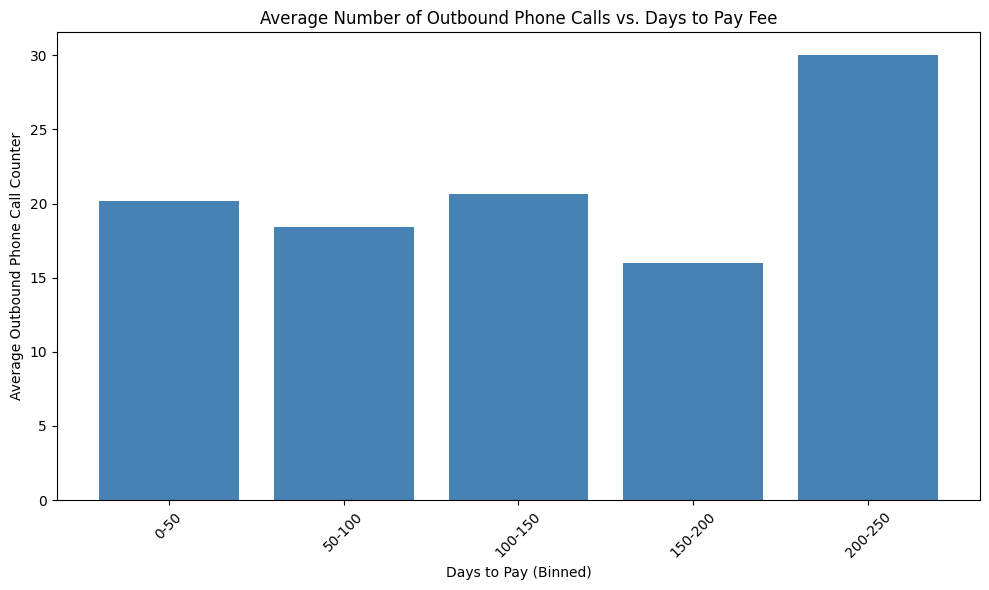

In [59]:
fdf['days_to_pay'] = (fdf['paid_date'] - fdf['created_date']).dt.days
filtered_df = fdf[fdf['activity'] == 'Outbound Phone Call Activity'].copy()
bins = range(0, 361, 50)
labels = [f"{i}-{i+50}" for i in bins[:-1]]

filtered_df.loc[:, 'days_bin'] = pd.cut(filtered_df['days_to_pay'], bins=bins, labels=labels, right=False)
bin_avg_calls = filtered_df.groupby('days_bin', observed=False)['outbound_phone_call_counter'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(bin_avg_calls['days_bin'], bin_avg_calls['outbound_phone_call_counter'], color='steelblue')
plt.xlabel('Days to Pay (Binned)')
plt.ylabel('Average Outbound Phone Call Counter')
plt.title('Average Number of Outbound Phone Calls vs. Days to Pay Fee')
plt.xticks(rotation=45)
plt.subplots_adjust(right=1.8, top=1)
# for i,v in enumerate(bin_avg_calls['outbound_phone_call_counter']):
#     plt.text(i,v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [60]:
fdf['days_to_pay'].unique()

array([ 15,   0, 156,   9, 203,   5,  20,   4,  66,  19,  42,  33,  35,
        26, 109,  12,  13,  45,  68, 175,   6,  14,  29,  63,   7,  59,
        23,   2,   1,   8,  11,  46, 390,  36,  10,  38, 196,  41,  64,
        34,  25,  57, 201, 136,  21,  96,  27,   3,  47, 117, 148,  54,
        65])

In [61]:
fdf[['Tech Exam Scores', 'Coding Test Score', 'English Exam Scores','English Interview Score (15)']].dtypes

Tech Exam Scores                 object
Coding Test Score               float64
English Exam Scores              object
English Interview Score (15)    float64
dtype: object

In [62]:
fdf['Tech Exam Scores'] = pd.to_numeric(fdf['Tech Exam Scores'], errors='coerce')

In [63]:
fdf['English Exam Scores'] = pd.to_numeric(fdf['English Exam Scores'], errors='coerce')

In [64]:
fdf[['Tech Exam Scores', 'Coding Test Score', 'English Exam Scores','English Interview Score (15)']].dtypes

Tech Exam Scores                float64
Coding Test Score               float64
English Exam Scores             float64
English Interview Score (15)    float64
dtype: object

Number of leads pitched their preferred university: 0

Average scores of leads pitched their preferred university:
Tech Exam Scores               NaN
Coding Test Score              NaN
English Exam Scores            NaN
English Interview Score (15)   NaN
dtype: float64

Average scores of leads NOT pitched their preferred university:
Tech Exam Scores                0.478489
Coding Test Score               0.268359
English Exam Scores                  NaN
English Interview Score (15)    8.484707
dtype: float64


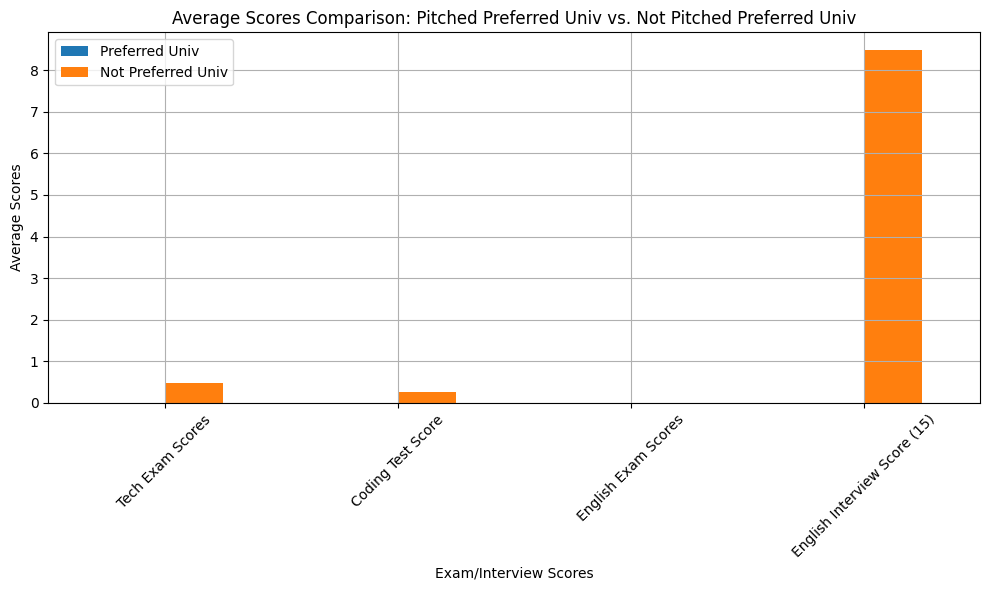

In [65]:

fdf['Pitched Preferred Univ'] = fdf['Univ. Pitched'] == fdf['Candidate Preferred College #1']
num_preferred_univ = fdf['Pitched Preferred Univ'].sum()
preferred_univ_scores = fdf[fdf['Pitched Preferred Univ']]
not_preferred_univ_scores = fdf[~fdf['Pitched Preferred Univ']]

average_scores_preferred = preferred_univ_scores[['Tech Exam Scores', 'Coding Test Score', 'English Exam Scores', 'English Interview Score (15)']].mean()
average_scores_not_preferred = not_preferred_univ_scores[['Tech Exam Scores', 'Coding Test Score', 'English Exam Scores', 'English Interview Score (15)']].mean()

print(f"Number of leads pitched their preferred university: {num_preferred_univ}\n")
print("Average scores of leads pitched their preferred university:")
print(average_scores_preferred)
print("\nAverage scores of leads NOT pitched their preferred university:")
print(average_scores_not_preferred)
scores_df = pd.DataFrame({
    'Preferred Univ': average_scores_preferred,
    'Not Preferred Univ': average_scores_not_preferred
})

scores_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Exam/Interview Scores')
plt.ylabel('Average Scores')
plt.title('Average Scores Comparison: Pitched Preferred Univ vs. Not Pitched Preferred Univ')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [66]:
fdf['days_to_pay'].unique()

array([ 15,   0, 156,   9, 203,   5,  20,   4,  66,  19,  42,  33,  35,
        26, 109,  12,  13,  45,  68, 175,   6,  14,  29,  63,   7,  59,
        23,   2,   1,   8,  11,  46, 390,  36,  10,  38, 196,  41,  64,
        34,  25,  57, 201, 136,  21,  96,  27,   3,  47, 117, 148,  54,
        65])

c:\Users\SIDDHARTH\AppData\Local\Programs\Python\Python312\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Number of leads pitched their preferred university: 8

Average English Interview Score (15) of leads pitched their preferred university:
8.375

Average English Interview Score (15) of leads NOT pitched their preferred university:
8.48


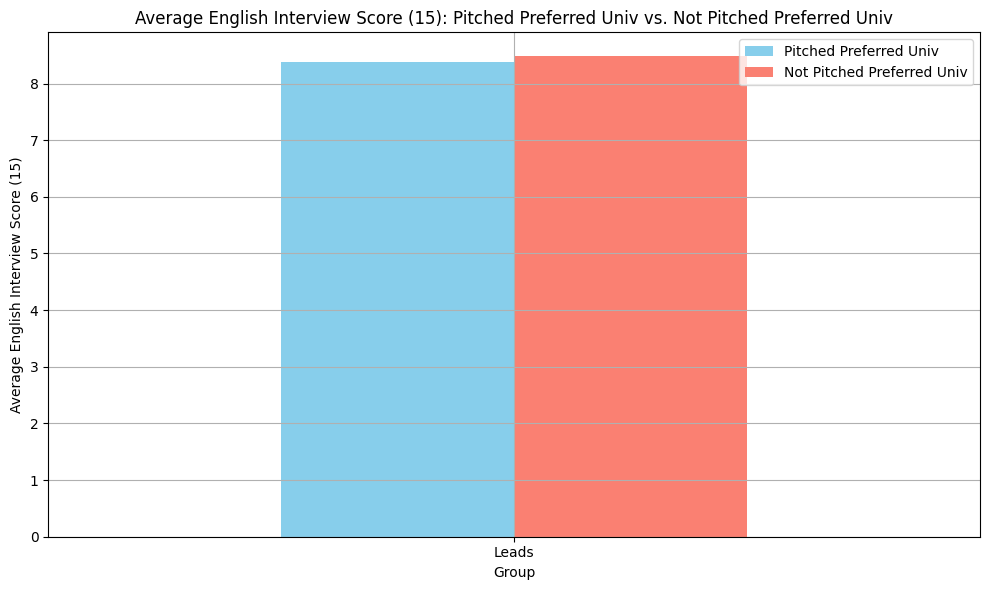

In [67]:
from fuzzywuzzy import fuzz

def partial_match(preferred, pitched):
    if isinstance(preferred, str) and isinstance(pitched, str):
        return fuzz.partial_ratio(preferred.lower(), pitched.lower()) >= 75
    return False
fdf['Pitched Preferred Univ'] = fdf.apply(
    lambda row: partial_match(row['Candidate Preferred College #1'], row['Univ. Pitched']), axis=1
)

agg_funcs = {
    'Pitched Preferred Univ': 'max',
    'English Interview Score (15)': 'mean'
}

aggregated_df = fdf.groupby('Lead Id').agg(agg_funcs).reset_index()
num_preferred_univ = aggregated_df['Pitched Preferred Univ'].sum()

preferred_univ_scores = aggregated_df[aggregated_df['Pitched Preferred Univ']]
not_preferred_univ_scores = aggregated_df[~aggregated_df['Pitched Preferred Univ']]

average_scores_preferred = preferred_univ_scores['English Interview Score (15)'].mean()
average_scores_not_preferred = not_preferred_univ_scores['English Interview Score (15)'].mean()

print(f"Number of leads pitched their preferred university: {num_preferred_univ}\n")
print("Average English Interview Score (15) of leads pitched their preferred university:")
print(average_scores_preferred)
print("\nAverage English Interview Score (15) of leads NOT pitched their preferred university:")
print(average_scores_not_preferred)

scores_df = pd.DataFrame({
    'Pitched Preferred Univ': [average_scores_preferred],
    'Not Pitched Preferred Univ': [average_scores_not_preferred]
})

scores_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.xlabel('Group')
plt.ylabel('Average English Interview Score (15)')
plt.title('Average English Interview Score (15): Pitched Preferred Univ vs. Not Pitched Preferred Univ')
plt.xticks(ticks=[0], labels=['Leads'], rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


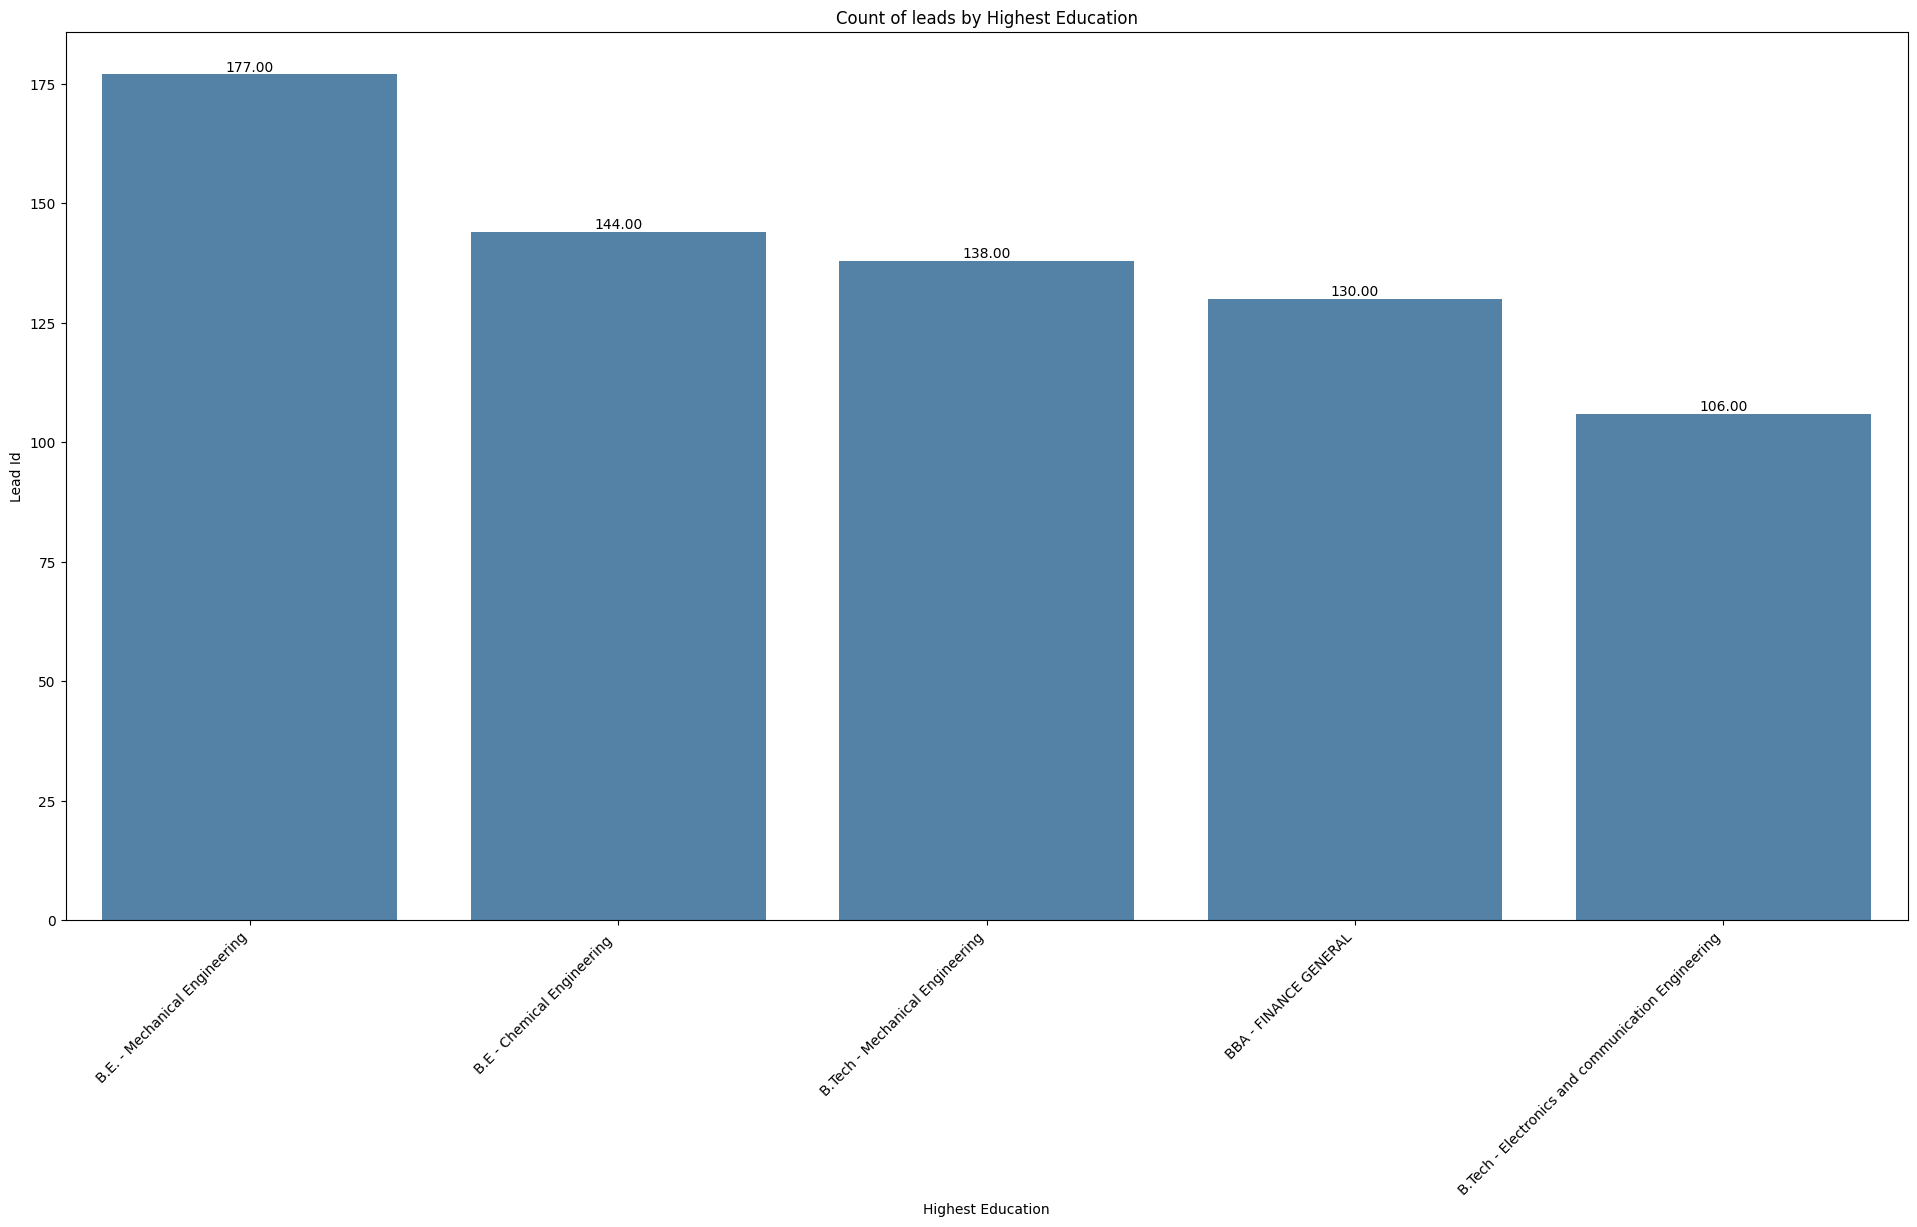

In [68]:
plt.figure(figsize=(12,8))
eduleads_top_5 = fdf.groupby('Highest Education')['Lead Id'].count().reset_index().sort_values(by='Lead Id', ascending=False).head(5)
ax = sns.barplot(x=eduleads_top_5['Highest Education'], y=eduleads_top_5['Lead Id'], color='steelblue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title('Count of leads by Highest Education')
plt.subplots_adjust(right=1.6, top=1.5)
for i,v in enumerate(eduleads_top_5['Lead Id']):
    plt.text(i,v, f'{v:.2f}', ha='center', va='bottom')
plt.show()

In [69]:
fdf['days_to_pay'].unique()

array([ 15,   0, 156,   9, 203,   5,  20,   4,  66,  19,  42,  33,  35,
        26, 109,  12,  13,  45,  68, 175,   6,  14,  29,  63,   7,  59,
        23,   2,   1,   8,  11,  46, 390,  36,  10,  38, 196,  41,  64,
        34,  25,  57, 201, 136,  21,  96,  27,   3,  47, 117, 148,  54,
        65])

## Plot

<Figure size 1000x600 with 0 Axes>

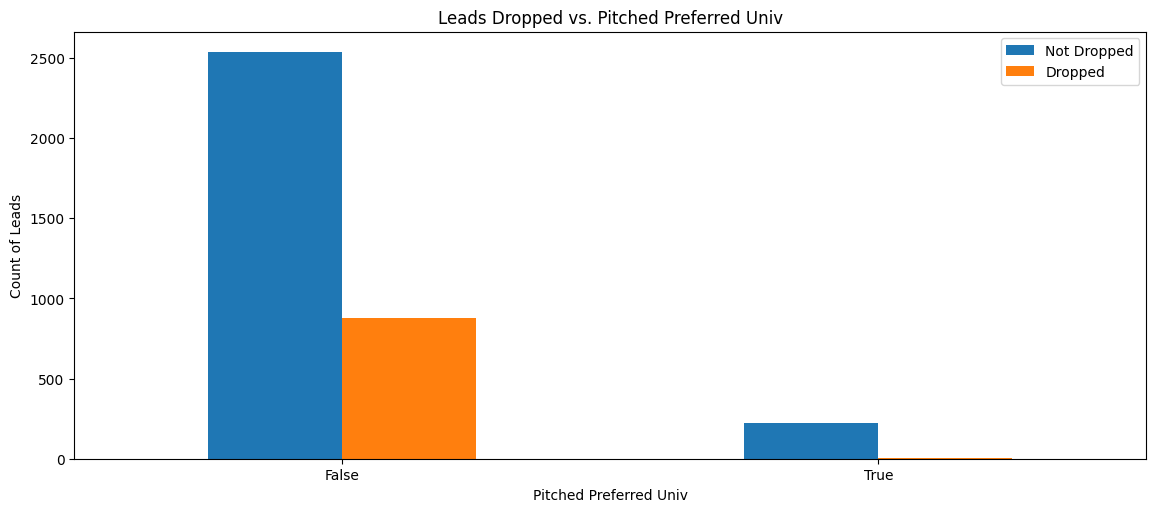

In [70]:
grouped = fdf.groupby(['Pitched Preferred Univ', 'is_dropped']).size().reset_index(name='count')

pivot_df = grouped.pivot(index='Pitched Preferred Univ', columns='is_dropped', values='count').fillna(0)
plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked=False)
plt.subplots_adjust(right=1.8, top=1)
plt.title('Leads Dropped vs. Pitched Preferred Univ')
plt.xlabel('Pitched Preferred Univ')
plt.ylabel('Count of Leads')
plt.xticks(ticks=[0, 1], labels=['False', 'True'], rotation=0)
plt.legend(labels=['Not Dropped', 'Dropped'])
plt.show()

In [71]:
fdf.head(1)

,lead_number,first_name,Lead Id,inbound_phone_call_counter,outbound_phone_call_counter,lead_stage,lead_score,owner,activity,date_of_call,status_x,call_duration_sec,calls_done_by,contacted_x,call_time,sales_squad,squad_role,lead_id,created_time,Ad Name,Campaign Name,form_name,platform,graduation_degree,graduation_percentage,work_experience,mapped,contacted_y,lsq_lead_stage,lsq_lead_owner,lsq_source,derived_score,Name,Lead ID,created_date,paid_date,cohort,source,agent,counsellor,prospect_id,status_y,Candidate Name,Counselor Name,Block Amount Received Date,Univ. Pitched,Candidate Preferred College #1,Candidate Preferred College #2,10th Percentage,12th Percentage,UG - CGPA (out of 10),GPA (Out of 4),PG - CGPA or %,Work Exp.,Highest Education,Designation - Company Name,Candidate Application Status,Candidate Loan Status,Remarks - General,Reason for dropping,"If dropped, mention stage of the application",,KYC & Acad Documents Received,Tech Exam Scores,Coding Test Score,English Exam Scores,Exam Taking Date,English Interview Score (15),Tech. interview Score (10),.1,Application Type,Intake Status,.2,Choice of School #1,Choice of Program #1,Passport #1,Resume #1,Degree #1,Transcript #1,Application Fee #1,LOR #1,SOP #1,Pending Stage #1,Application Status #1,Application Initation Date #1,App Partially Submitted Date #1,Application Submission Date #1,Offer Letter #1,Offer Letter Provision Date #1,Deposit #1,Deposit Date Paid #1,.3,Choice of School #2,Choice of Program #2,Application Fee #2,LOR #2,SOP #2,Pending Stage #2,Application Status #2,Application Initation Date #2,App Partially Submitted Date #2,Application Submission Date #2,Offer Letter #2,Offer Letter Provision Date #2,Deposit #2,Deposit Date Paid #2,.4,Choice of School #3,Choice of Program #3,Application Fee #3,LOR #3,SOP #3,Pending Stage #3,Application Status #3,Application Initation Date #3,App Partially Submitted Date #3,Application Submission Date #3,Offer Letter #3,Offer Letter Provision Date #3,Deposit #3,Deposit Date Paid #3,Remarks #3 (If Rejected),.5,Choice of School #4,Choice of Program #4,Application Fee #4,LOR #4,SOP #4,Pending Stage #4,Application Status #4,Application Initation Date #4,App Partially Submitted Date #4,Application Submission Date #4,Offer Letter #4,Offer Letter Provision Date #4,Deposit #4,Deposit Date Paid #4,Remarks #4 (If Rejected),.6,Choice of School #5,Choice of Program #5,Application Fee #5,LOR #5,SOP #5,Pending Stage #5,Application Status #5,Application Initation Date #5,App Partially Submitted Date #5,Application Submission Date #5,Offer Letter #5,Offer Letter Provision Date #5,Deposit #5,Deposit Date Paid #5,Remarks #5 (If Rejected),.7,IIM / IIT Status,Loan Status,Loan Partner I,Loan Partner II,Loan Application Submit Date,Existing Loan,CIBIL SCORE,No. of defaults,.8,Aadhar Card,PAN Card,Passport,CV/Resume,CIBIL Score,Bank Statement (Savings - 6mo),Affidavit Letter,Sponsorship Letter,Offer Letter,Offer Letter Submission Date,.9,Financials Submission,Financials Submission Date,i20 Provisioned,i20 Provisioned Date,Remarks,Status,SOP Status,.10,is_dropped,days_to_pay,Pitched Preferred Univ
0,2704878,Pranav,l:861701659054416,3,0,Token Amount,1,Ratnesh Mishra,Inbound Phone Call Activity,2024-04-16 16:29:00,Answered,232,SuryanshTiwari,NaN,2024-04-16 16:29:00,Squad 3,Agent,l:861701659054416,2024-03-29 05:37:00,USP_Webinar_MSunder12Months,USP_Webinar_070324,BM - US pathway Webinar Form - More Volume - N...,Facebook,Others,60,0,Mapped,Contacted,Application Submitted,Ratnesh Mishra,Zoom Webinar,2.5,Pranav,l:861701659054416,2024-03-30,2024-04-14,Cohort 2,Zoom Webinar,Ratnesh Mishra,Shashwat,0181dce5-7a90-4d3f-b832-aee660d2aeb5,ACTIVE TOKEN,Pranav,Shashwat Shourya,2024-04-14 00:00:00,NaN,"University at Buffalo (SUNY), School of Manage...",DePaul Kellstadt Graduate School of Business,88.18,80.3375,7.01,2.8,6.0,6.0,M.com,Senior Analyst - AXA Business Services PVT. LTD,Candidate Deferred to next intake,Candidate Deferred to next intake,DePaul submitted on 2

## Which source generate more leads?

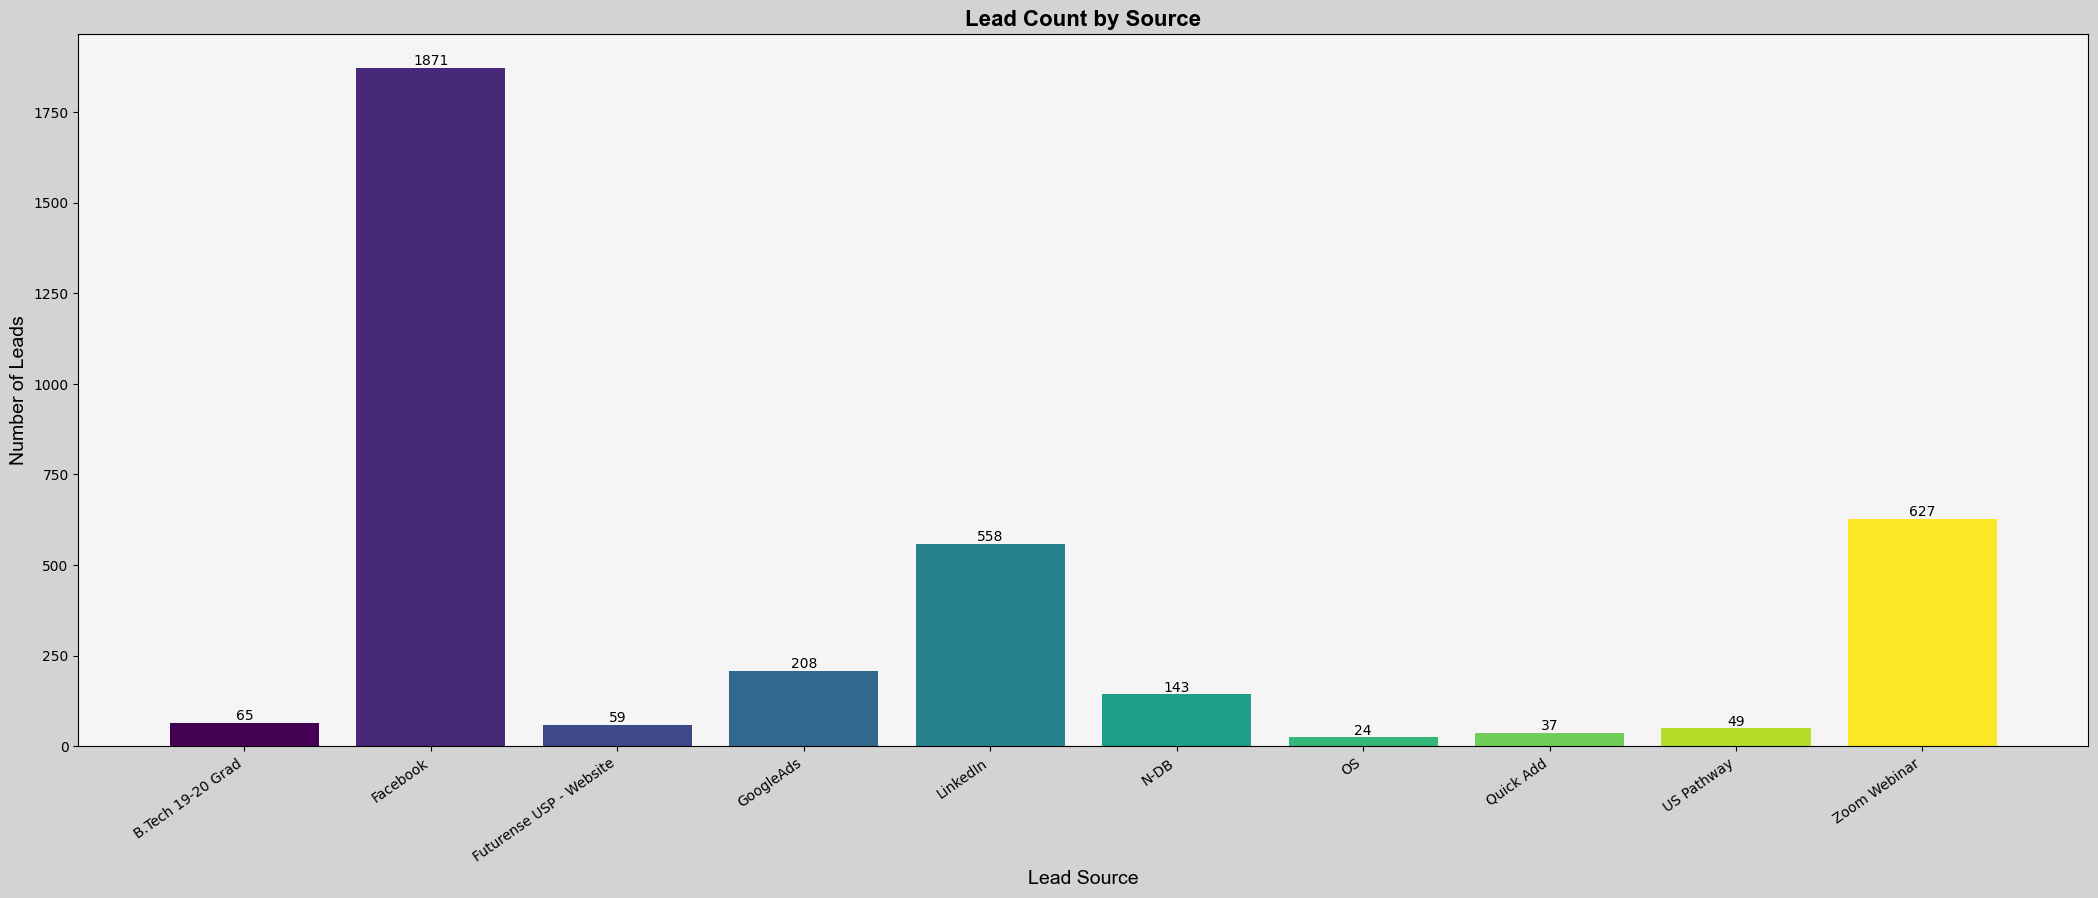

In [72]:
x = fdf.groupby('lsq_source')['Lead Id'].count().reset_index()
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('lightgrey')
ax.set_facecolor('whitesmoke')
plt.subplots_adjust(right=1.8, top=1)
title_font = {'family': 'Arial', 'size': 16, 'weight': 'bold'}
label_font = {'family': 'Arial', 'size': 14}
ax.set_title('Lead Count by Source', fontdict=title_font)
ax.set_xlabel('Lead Source', fontdict=label_font)
ax.set_ylabel('Number of Leads', fontdict=label_font)
viridis = plt.get_cmap('viridis', len(x))
bars = ax.bar(x=x['lsq_source'], height=x['Lead Id'], color=viridis(range(len(x))))
plt.xticks(rotation=35, ha='right')
for i, v in enumerate(x['Lead Id']):
    ax.text(i, v, f'{v}', ha='center', va='bottom', fontsize=10, color='black')
plt.show()


In [73]:
fdf.head(1)

,lead_number,first_name,Lead Id,inbound_phone_call_counter,outbound_phone_call_counter,lead_stage,lead_score,owner,activity,date_of_call,status_x,call_duration_sec,calls_done_by,contacted_x,call_time,sales_squad,squad_role,lead_id,created_time,Ad Name,Campaign Name,form_name,platform,graduation_degree,graduation_percentage,work_experience,mapped,contacted_y,lsq_lead_stage,lsq_lead_owner,lsq_source,derived_score,Name,Lead ID,created_date,paid_date,cohort,source,agent,counsellor,prospect_id,status_y,Candidate Name,Counselor Name,Block Amount Received Date,Univ. Pitched,Candidate Preferred College #1,Candidate Preferred College #2,10th Percentage,12th Percentage,UG - CGPA (out of 10),GPA (Out of 4),PG - CGPA or %,Work Exp.,Highest Education,Designation - Company Name,Candidate Application Status,Candidate Loan Status,Remarks - General,Reason for dropping,"If dropped, mention stage of the application",,KYC & Acad Documents Received,Tech Exam Scores,Coding Test Score,English Exam Scores,Exam Taking Date,English Interview Score (15),Tech. interview Score (10),.1,Application Type,Intake Status,.2,Choice of School #1,Choice of Program #1,Passport #1,Resume #1,Degree #1,Transcript #1,Application Fee #1,LOR #1,SOP #1,Pending Stage #1,Application Status #1,Application Initation Date #1,App Partially Submitted Date #1,Application Submission Date #1,Offer Letter #1,Offer Letter Provision Date #1,Deposit #1,Deposit Date Paid #1,.3,Choice of School #2,Choice of Program #2,Application Fee #2,LOR #2,SOP #2,Pending Stage #2,Application Status #2,Application Initation Date #2,App Partially Submitted Date #2,Application Submission Date #2,Offer Letter #2,Offer Letter Provision Date #2,Deposit #2,Deposit Date Paid #2,.4,Choice of School #3,Choice of Program #3,Application Fee #3,LOR #3,SOP #3,Pending Stage #3,Application Status #3,Application Initation Date #3,App Partially Submitted Date #3,Application Submission Date #3,Offer Letter #3,Offer Letter Provision Date #3,Deposit #3,Deposit Date Paid #3,Remarks #3 (If Rejected),.5,Choice of School #4,Choice of Program #4,Application Fee #4,LOR #4,SOP #4,Pending Stage #4,Application Status #4,Application Initation Date #4,App Partially Submitted Date #4,Application Submission Date #4,Offer Letter #4,Offer Letter Provision Date #4,Deposit #4,Deposit Date Paid #4,Remarks #4 (If Rejected),.6,Choice of School #5,Choice of Program #5,Application Fee #5,LOR #5,SOP #5,Pending Stage #5,Application Status #5,Application Initation Date #5,App Partially Submitted Date #5,Application Submission Date #5,Offer Letter #5,Offer Letter Provision Date #5,Deposit #5,Deposit Date Paid #5,Remarks #5 (If Rejected),.7,IIM / IIT Status,Loan Status,Loan Partner I,Loan Partner II,Loan Application Submit Date,Existing Loan,CIBIL SCORE,No. of defaults,.8,Aadhar Card,PAN Card,Passport,CV/Resume,CIBIL Score,Bank Statement (Savings - 6mo),Affidavit Letter,Sponsorship Letter,Offer Letter,Offer Letter Submission Date,.9,Financials Submission,Financials Submission Date,i20 Provisioned,i20 Provisioned Date,Remarks,Status,SOP Status,.10,is_dropped,days_to_pay,Pitched Preferred Univ
0,2704878,Pranav,l:861701659054416,3,0,Token Amount,1,Ratnesh Mishra,Inbound Phone Call Activity,2024-04-16 16:29:00,Answered,232,SuryanshTiwari,NaN,2024-04-16 16:29:00,Squad 3,Agent,l:861701659054416,2024-03-29 05:37:00,USP_Webinar_MSunder12Months,USP_Webinar_070324,BM - US pathway Webinar Form - More Volume - N...,Facebook,Others,60,0,Mapped,Contacted,Application Submitted,Ratnesh Mishra,Zoom Webinar,2.5,Pranav,l:861701659054416,2024-03-30,2024-04-14,Cohort 2,Zoom Webinar,Ratnesh Mishra,Shashwat,0181dce5-7a90-4d3f-b832-aee660d2aeb5,ACTIVE TOKEN,Pranav,Shashwat Shourya,2024-04-14 00:00:00,NaN,"University at Buffalo (SUNY), School of Manage...",DePaul Kellstadt Graduate School of Business,88.18,80.3375,7.01,2.8,6.0,6.0,M.com,Senior Analyst - AXA Business Services PVT. LTD,Candidate Deferred to next intake,Candidate Deferred to next intake,DePaul submitted on 2

In [74]:
len(fdf['Campaign Name'])

3641

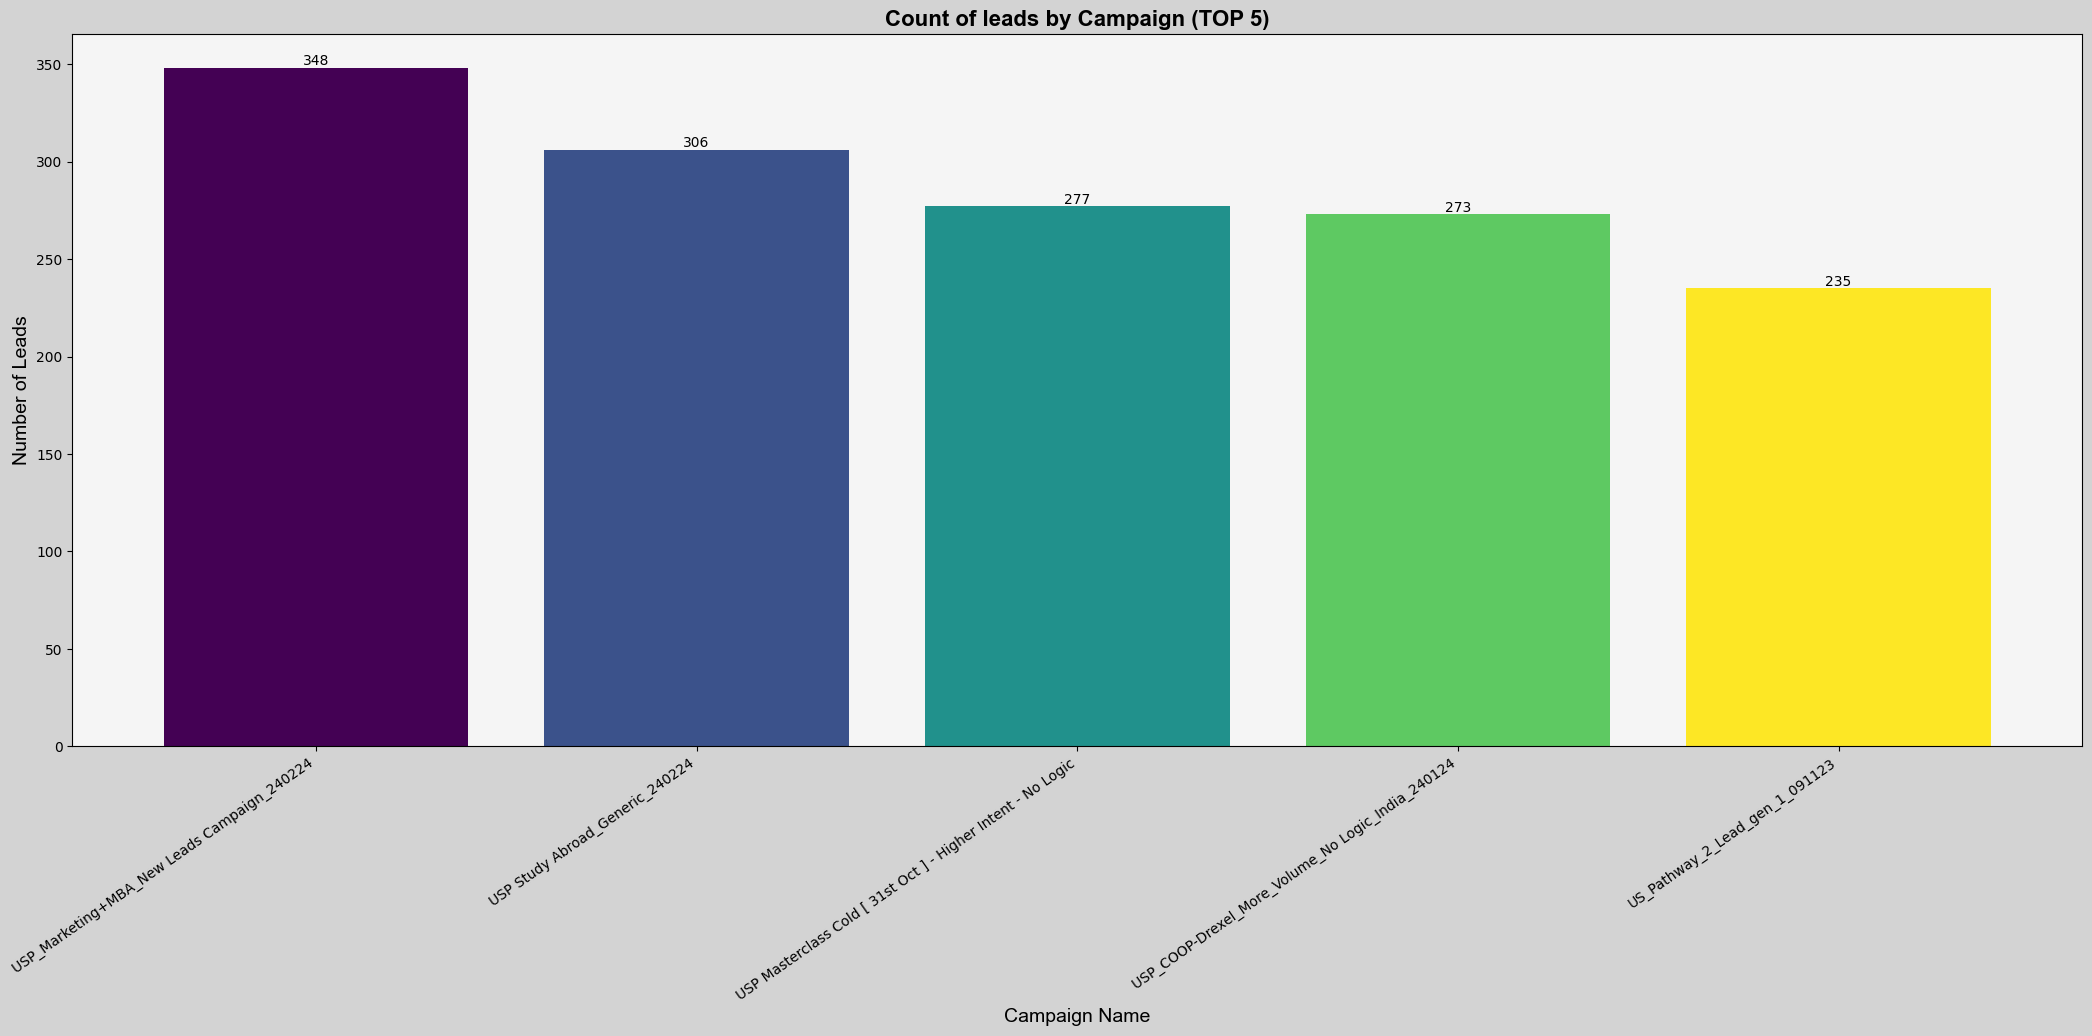

In [75]:
grouped = fdf.groupby('Campaign Name')['Lead Id'].count().reset_index(name='count').sort_values(by='count', ascending=False)
top_5_grouped = grouped.head(5)
bottom_5_grouped = grouped.tail(5)

fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('lightgrey')
ax.set_facecolor('whitesmoke')
plt.subplots_adjust(right=1.8, top=1)

title_font = {'family': 'Arial', 'size': 16, 'weight': 'bold'}
label_font = {'family': 'Arial', 'size': 14}
ax.set_title('Count of leads by Campaign (TOP 5)', fontdict=title_font)
ax.set_xlabel('Campaign Name', fontdict=label_font)
ax.set_ylabel('Number of Leads', fontdict=label_font)
viridis = plt.get_cmap('viridis', len(top_5_grouped))

bars = ax.bar(x=top_5_grouped['Campaign Name'], height=top_5_grouped['count'], color=viridis(range(len(top_5_grouped))))
plt.xticks(rotation=35, ha='right')
for i, v in enumerate(top_5_grouped['count']):
    ax.text(i, v, f'{v}', ha='center', va='bottom', fontsize=10, color='black')
plt.show()

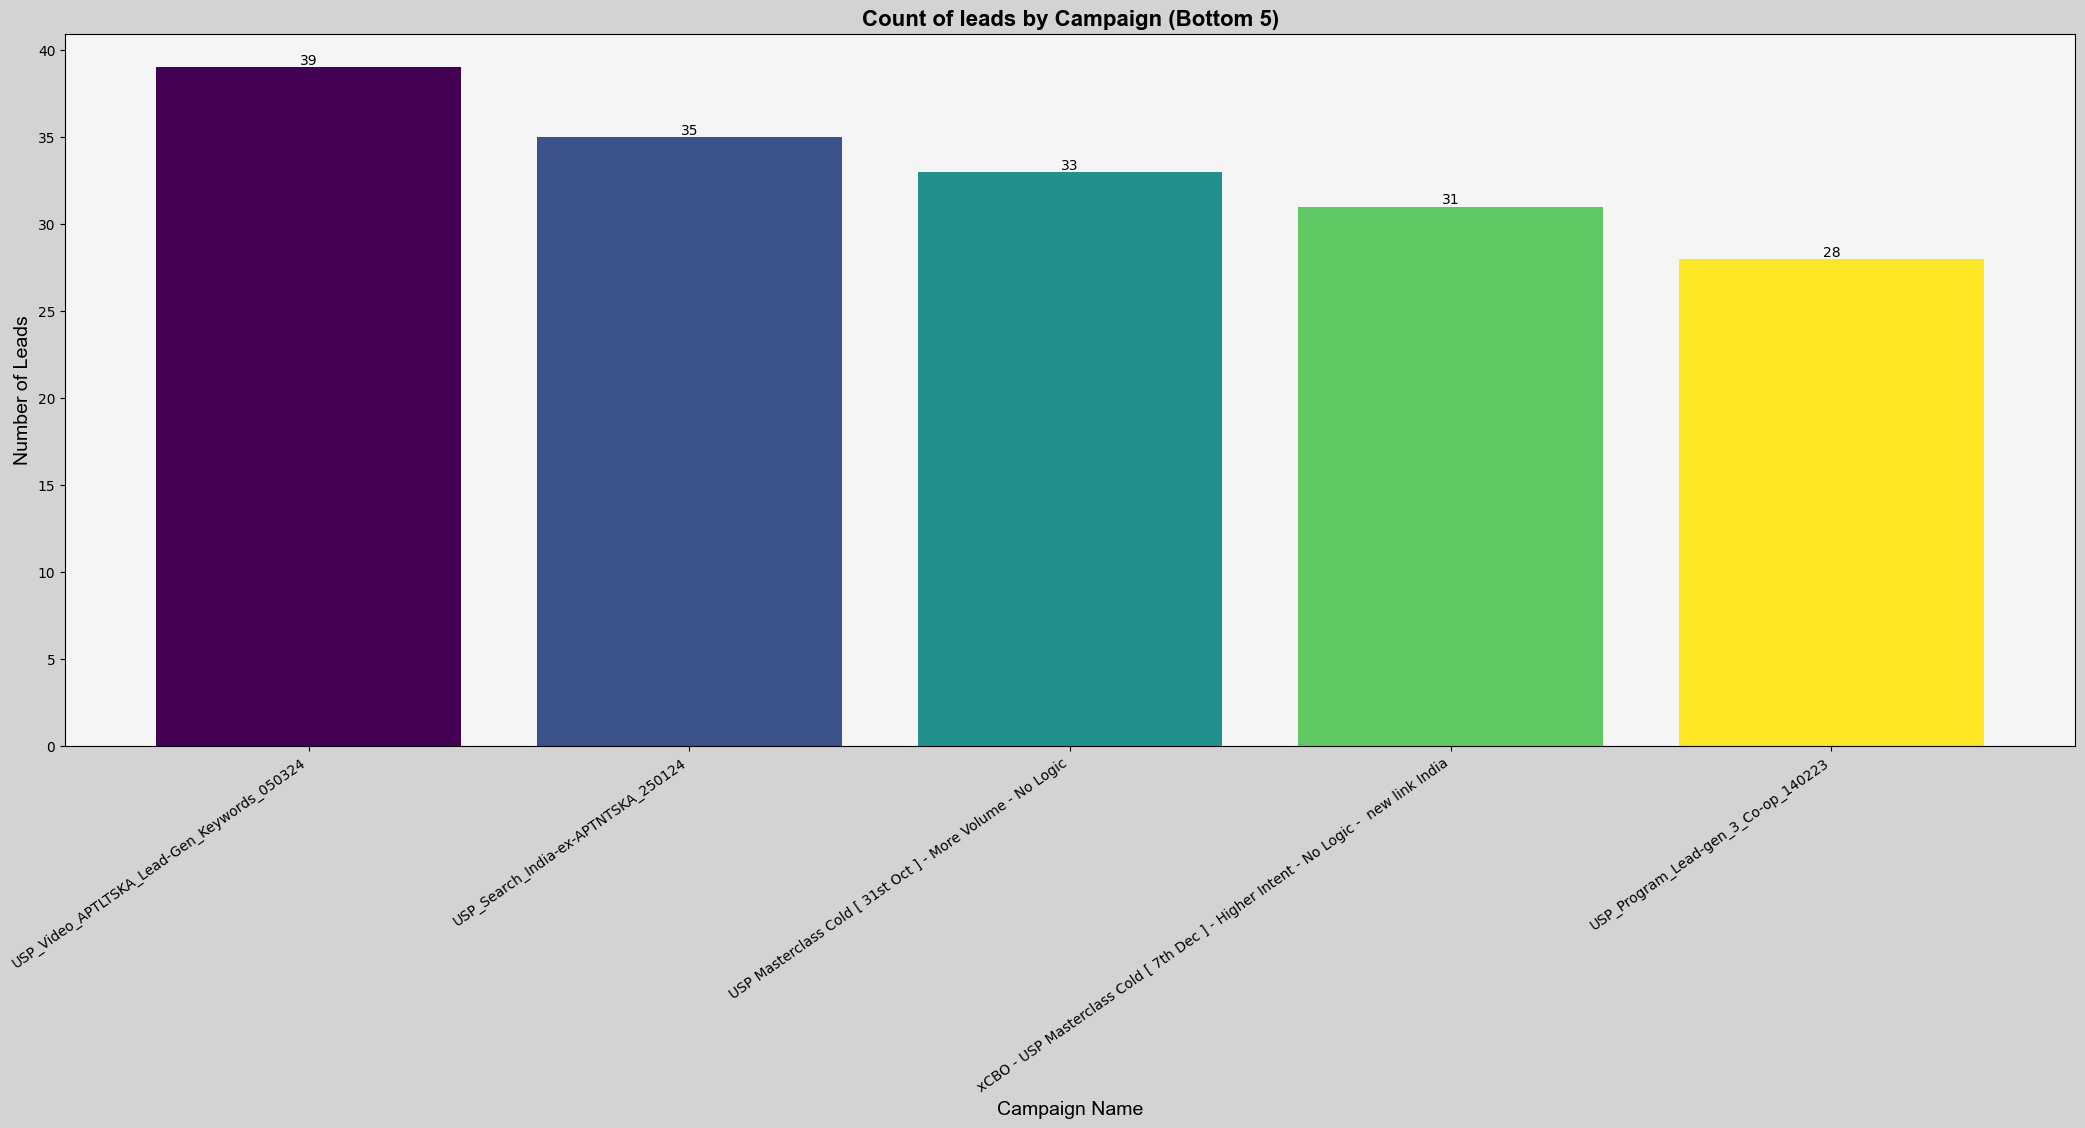

In [76]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('lightgrey')
ax.set_facecolor('whitesmoke')
plt.subplots_adjust(right=1.8, top=1)
title_font = {'family': 'Arial', 'size': 16, 'weight': 'bold'}
label_font = {'family': 'Arial', 'size': 14}
ax.set_title('Count of leads by Campaign (Bottom 5)', fontdict=title_font)
ax.set_xlabel('Campaign Name', fontdict=label_font)
ax.set_ylabel('Number of Leads', fontdict=label_font)
viridis = plt.get_cmap('viridis', len(bottom_5_grouped))

bars = ax.bar(x=bottom_5_grouped['Campaign Name'], height=bottom_5_grouped['count'], color=viridis(range(len(bottom_5_grouped))))
plt.xticks(rotation=35, ha='right')
for i, v in enumerate(bottom_5_grouped['count']):
    ax.text(i, v, f'{v}', ha='center', va='bottom', fontsize=10, color='black')
plt.show()

In [77]:
print(len(grouped))

26


In [78]:
cmp = pd.DataFrame(pd.read_excel(r"F:\LPU\Code\Python\templates\cleaned_campaign_performance.xlsx"))
cmp.head(1)

,dates,campaign_name,campaign_start_date,creative_name,total_spent,impressions,clicks,click_through_rate,leads,platform,adset_name
0,2024-04-29,USP_Search_APTNTSKA_250124,2024-01-25,--,6766.15,1250,220,0.176,25.0,Google,GMAT/GRE


In [79]:
temp = cmp.groupby('campaign_name')['total_spent'].sum().reset_index()
temp.head(1)

,campaign_name,total_spent
0,CBO - USP Masterclass Cold [ 15th Dec ] - High...,186700.48


In [80]:
cmp['campaign_name'].duplicated().sum()

np.int64(28493)

In [81]:
grouped['Campaign Name'].duplicated().any()

np.False_

In [82]:
for idx, row in temp.iterrows():
    if row['campaign_name'] == 'USP_Search_APTNTSKA_250124':
        print(row['total_spent'])

789571.12


In [83]:
for idx, row in temp.iterrows():
        grouped.loc[grouped['Campaign Name'] == row['campaign_name'], 'total_spent'] = row['total_spent']

In [84]:
temp[temp['campaign_name'] == 'USP Study Abroad_Generic_240224']['total_spent']

9    2126684.24
Name: total_spent, dtype: float64

In [85]:
len(grouped)

26

In [86]:
for idx, row in conversion_data.iterrows():
        grouped.loc[grouped['Campaign Name'] == row['campaign_name'], 'og_leads'] = row['leads']

In [87]:
grouped

,Campaign Name,count,total_spent,og_leads
10,USP_Marketing+MBA_New Leads Campaign_240224,348,1125425.52,2390.00
6,USP Study Abroad_Generic_240224,306,2126684.24,4630.00
4,USP Masterclass Cold [ 31st Oct ] - Higher Int...,277,205642.99,888.00
8,USP_COOP-Drexel_More_Volume_No Logic_India_240124,273,126657.36,1096.00
22,US_Pathway_2_Lead_gen_1_091123,235,1884063.88,1232.00
24,US_Pathway_2_Lead_gen_3_241123,229,1749087.89,874.00
23,US_Pathway_2_Lead_gen_2_091123,184,1469168.59,723.00
2,CBO - USP Masterclass Cold [ 23rd Nov ] - High...,176,196255.37,1093.00
7,USP_2_Lead-gen-1_220124,163,484768.66,2124.00
20,USP_Webinar2_270324,156,152751.12,343.00


In [88]:
grouped = grouped.rename(columns={'count' : 'converted_leads'})

In [89]:
grouped['cost_per_lead'] = grouped['total_spent'] / grouped['og_leads']

In [90]:
grouped.head(5)

,Campaign Name,converted_leads,total_spent,og_leads,cost_per_lead
10,USP_Marketing+MBA_New Leads Campaign_240224,348,1125425.52,2390.0,470.889339
6,USP Study Abroad_Generic_240224,306,2126684.24,4630.0,459.327050
4,USP Masterclass Cold [ 31st Oct ] - Higher Int...,277,205642.99,888.0,231.579944
8,USP_COOP-Drexel_More_Volume_No Logic_India_240124,273,126657.36,1096.0,115.563285
22,US_Pathway_2_Lead_gen_1_091123,235,1884063.88,1232.0,1529.272630


## ROI

In [91]:
grouped['roi'] = ((grouped['cost_per_lead'] * grouped['converted_leads']) / grouped['total_spent']) * 100

In [92]:
len(grouped['Campaign Name'].unique())

26

In [93]:
len(conversion_data['campaign_name'].unique())

41

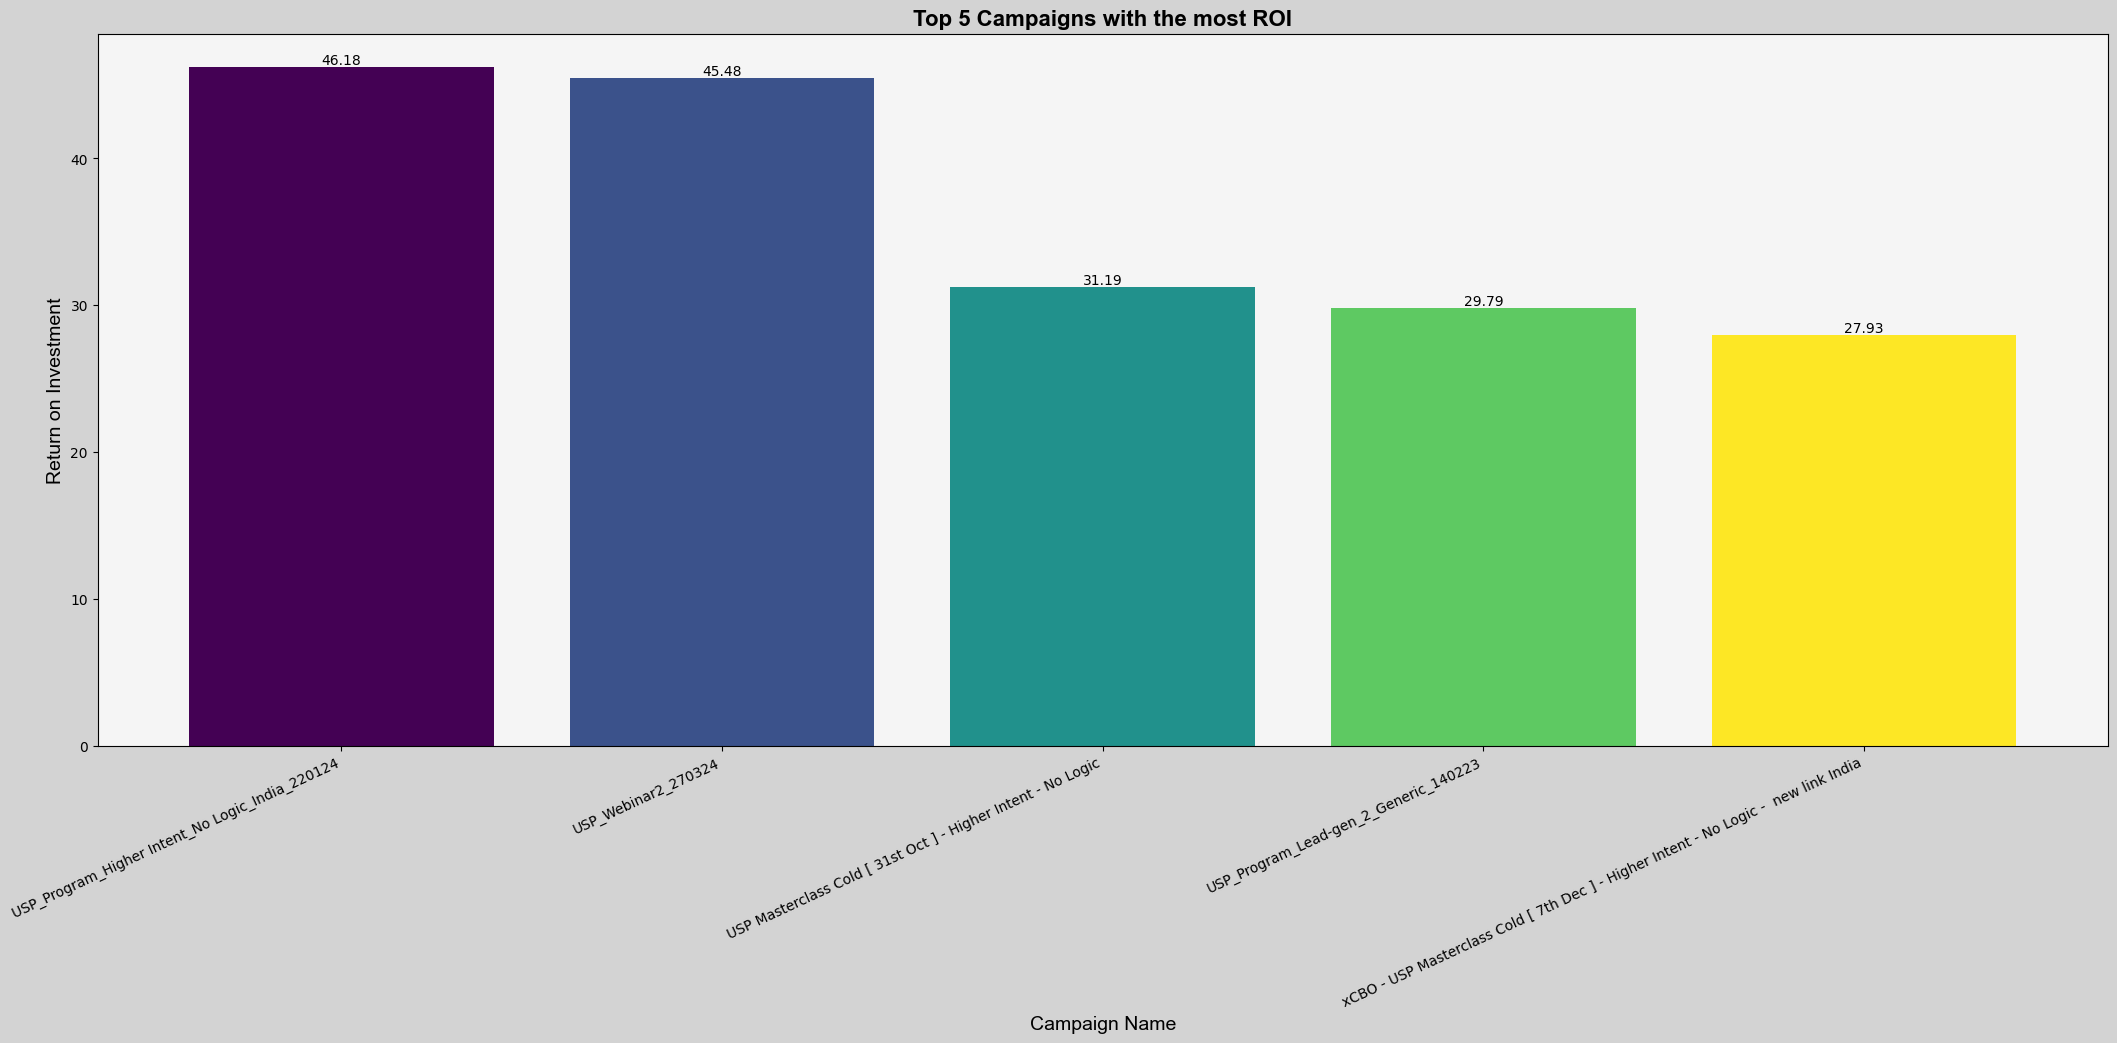

In [94]:
top_5_grouped = grouped.sort_values(by='roi', ascending=False).head(5)

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(right=1.8, top=1)
fig.patch.set_facecolor('lightgrey')
ax.set_facecolor('whitesmoke')

title_font = {'family': 'Arial', 'size': 16, 'weight': 'bold'}
label_font = {'family': 'Arial', 'size': 14}
ax.set_title('Top 5 Campaigns with the most ROI', fontdict=title_font)
ax.set_xlabel('Campaign Name', fontdict=label_font)
ax.set_ylabel('Return on Investment', fontdict=label_font)
viridis = plt.get_cmap('viridis', len(top_5_grouped))

bars = ax.bar(x=top_5_grouped['Campaign Name'], height=top_5_grouped['roi'], color=viridis(range(len(top_5_grouped))))
plt.xticks(rotation=25, ha='right')
for i, v in enumerate(top_5_grouped['roi']):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=10, color='black')

In [95]:
top2_roi = grouped.sort_values(by='roi',ascending=False).head(2)
top3_roi = grouped.sort_values(by='roi',ascending=False).head(3)

# What would be the ideal Amount to be spent on a campaign to gain maximum roi?

In [96]:
top2_ts_avg = top2_roi['total_spent'].sum() / 2
top3_ts_avg = top3_roi['total_spent'].sum() / 3
final_ts_avg = (top3_ts_avg + top2_ts_avg) / 2
print(f"Ideal Amount to be spent on a campaign to gain max roi : {final_ts_avg:.2f}")

Ideal Amount to be spent on a campaign to gain max roi : 140364.43


# Ideal Amount to be spent on a campaign to gain max roi : 140364.43

In [97]:
grouped.sort_values(by='roi', ascending=False)

,Campaign Name,converted_leads,total_spent,og_leads,cost_per_lead,roi
11,USP_Program_Higher Intent_No Logic_India_220124,151,101866.32,327.00,311.517798,46.177370
20,USP_Webinar2_270324,156,152751.12,343.00,445.338542,45.481050
4,USP Masterclass Cold [ 31st Oct ] - Higher Int...,277,205642.99,888.00,231.579944,31.193694
13,USP_Program_Lead-gen_2_Generic_140223,70,80827.43,235.00,343.946511,29.787234
25,xCBO - USP Masterclass Cold [ 7th Dec ] - High...,31,13562.84,111.00,122.187748,27.927928
24,US_Pathway_2_Lead_gen_3_241123,229,1749087.89,874.00,2001.244725,26.201373
23,US_Pathway_2_Lead_gen_2_091123,184,1469168.59,723.00,2032.045076,25.449516
8,USP_COOP-Drexel_More_Volume_No Logic_India_240124,273,126657.36,1096.00,115.563285,24.908759
12,USP_Program_Higher Intent_No Logic_South-state...,68,178012.52,309.00,576.092298,22.006472
22,US_Pathway_2_Lead_gen_1_091123,235,1884063.88,1232.00,1529.272630,19.074675


In [98]:
nonprofit_campaigns = []
for idx, row in conversion_data.iterrows():
    flag = False
    for a, b in grouped.iterrows():
        if row['campaign_name'] == b['Campaign Name']:
            flag = True
    if not flag:
        nonprofit_campaigns.append(row['campaign_name'])

In [99]:
print(f'Number of non-profit campaigns : {len(nonprofit_campaigns)}')

Number of non-profit campaigns : 15


# On an average what is the percentage of potential leads in each campaign?

In [100]:
print(f'On an average the percentage of potential leads we can expect in each campaign is : {((grouped['converted_leads'].sum() / grouped['og_leads'].sum()) * 100):.2f}%')

On an average the percentage of potential leads we can expect in each campaign is : 11.89%


### Analyzing campaigns from which no lead got converted

In [101]:
usls_df = df[df['Campaign Name'].isin(nonprofit_campaigns)]

## Leads with 'derived_score' in between the 0 and 1 are the most dropped leads

In [102]:
usls_df['derived_score'].value_counts()

derived_score
 0.50    4319
 0.75    3085
 1.00    2882
 0.00    2680
 0.25    2140
 1.25     834
 1.50     625
-0.25     461
-0.50     229
 1.75     153
 2.00     127
 2.75      78
 2.25      61
 3.00      44
 2.50      33
 3.25      25
Name: count, dtype: int64

In [103]:
usls_df.head(1)

,lead_number,first_name,Lead Id,inbound_phone_call_counter,outbound_phone_call_counter,lead_stage,lead_score,owner,activity,date_of_call,status,call_duration_sec,calls_done_by,contacted_x,call_time,sales_squad,squad_role,lead_id,created_time,Ad Name,Campaign Name,form_name,platform,graduation_degree,graduation_percentage,work_experience,mapped,contacted_y,lsq_lead_stage,lsq_lead_owner,lsq_source,derived_score
2,2721420,Purnima kuppala,l:430457079653387,3,0,Counselling Booked,2,Jatin Luthra,Inbound Phone Call Activity,2024-04-16 10:49:00,Answered,18,JatinLuthra,NaN,2024-04-16 10:49:00,Squad 3,Agent,l:430457079653387,2024-04-08 20:56:00,#6 ( Graphic ) - Master's Degree In 12 Months,USP_2_Lead-gen-2_Top4-states_050424,BM - US pathway Webinar Form - More Volume - N...,Facebook,B.Tech IT,65.0,5.0,Mapped,Contacted,Counselling Booked,Jatin Luthra,Facebook,1.25


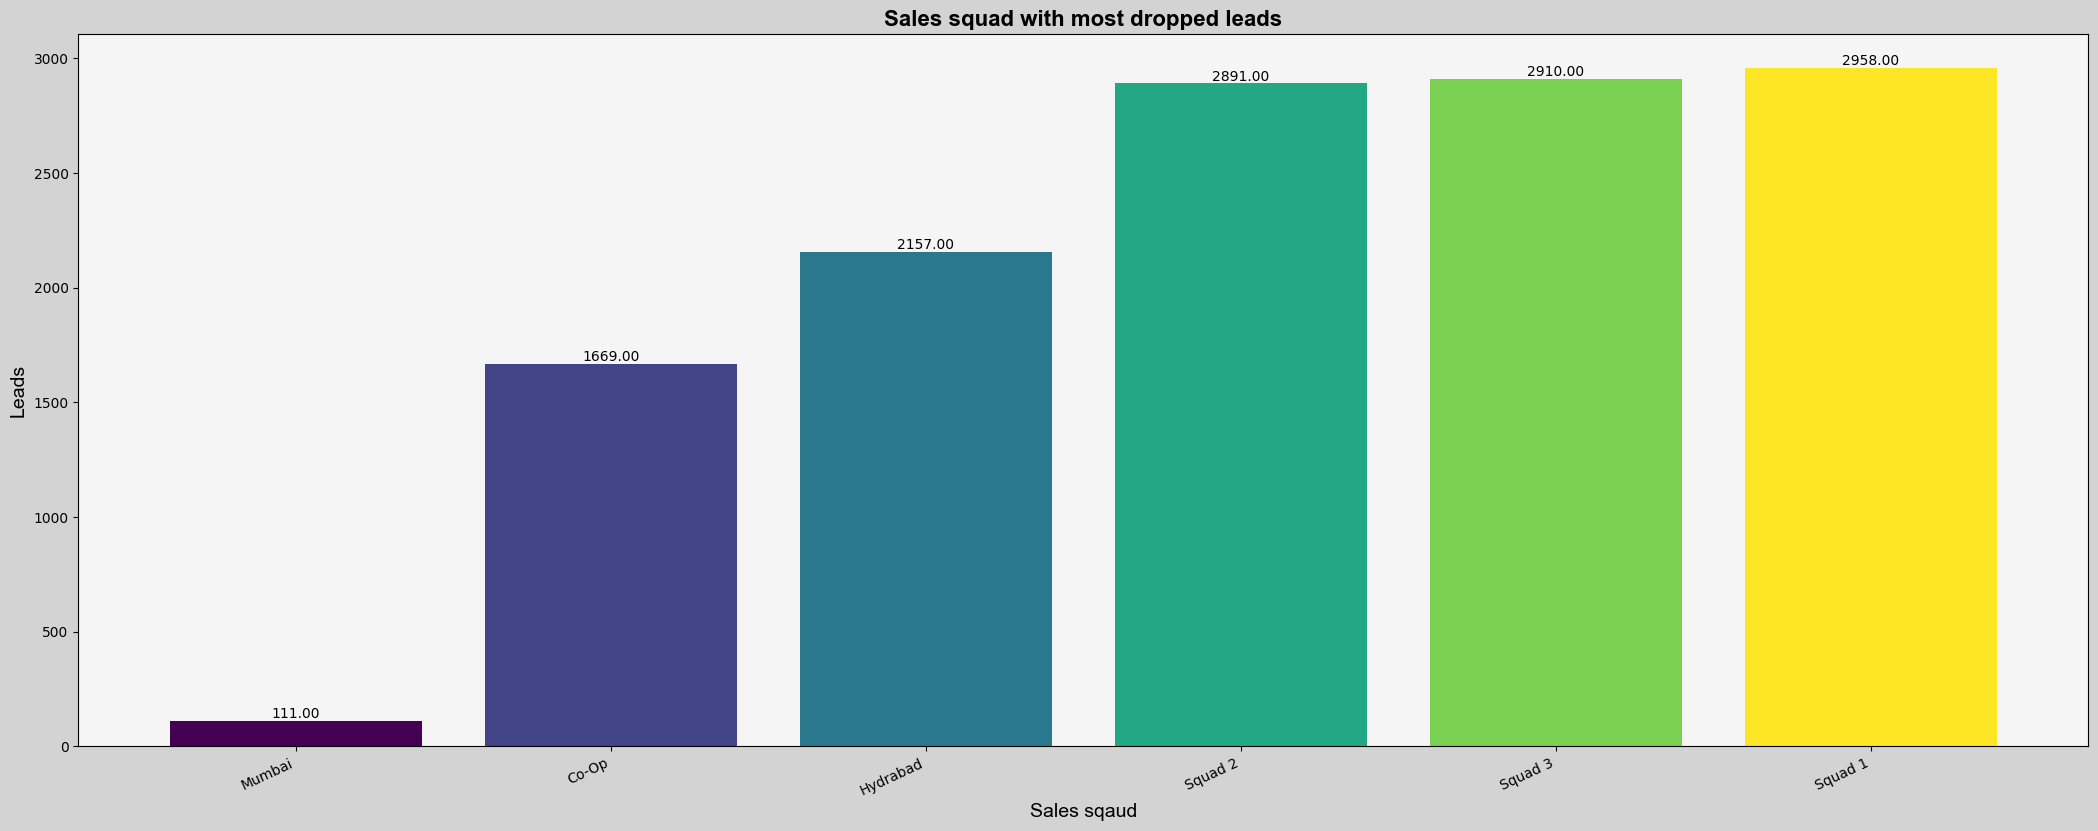

In [104]:
x = usls_df.groupby('sales_squad')['Lead Id'].count().reset_index().sort_values(by='Lead Id')


fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(right=1.8, top=1)
fig.patch.set_facecolor('lightgrey')
ax.set_facecolor('whitesmoke')

title_font = {'family': 'Arial', 'size': 16, 'weight': 'bold'}
label_font = {'family': 'Arial', 'size': 14}
ax.set_title('Sales squad with most dropped leads', fontdict=title_font)
ax.set_xlabel('Sales sqaud', fontdict=label_font)
ax.set_ylabel('Leads', fontdict=label_font)
viridis = plt.get_cmap('viridis', len(x))

bars = ax.bar(x=x['sales_squad'], height=x['Lead Id'], color=viridis(range(len(x))))
plt.xticks(rotation=25, ha='right')

for i, v in enumerate(x['Lead Id']):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=10, color='black')

In [105]:
for idx, row in x.iterrows():
    ct = len(df[df['sales_squad'] == row['sales_squad']])
    x.loc[x['sales_squad'] == row['sales_squad'], 'total_leads'] = ct

In [106]:
x = x.rename(columns={'Lead Id' : 'leads count'})
x = x.rename(columns={'leads count' : 'leads dropped'})
x


,sales_squad,leads dropped,total_leads
2,Mumbai,111,1002.0
0,Co-Op,1669,21911.0
1,Hydrabad,2157,9404.0
4,Squad 2,2891,31568.0
5,Squad 3,2910,35011.0
3,Squad 1,2958,32349.0


In [107]:
x['dropped ratio'] = (x['leads dropped'] / x['total_leads']) * 100
x

,sales_squad,leads dropped,total_leads,dropped ratio
2,Mumbai,111,1002.0,11.077844
0,Co-Op,1669,21911.0,7.617179
1,Hydrabad,2157,9404.0,22.937048
4,Squad 2,2891,31568.0,9.158008
5,Squad 3,2910,35011.0,8.311673
3,Squad 1,2958,32349.0,9.144023


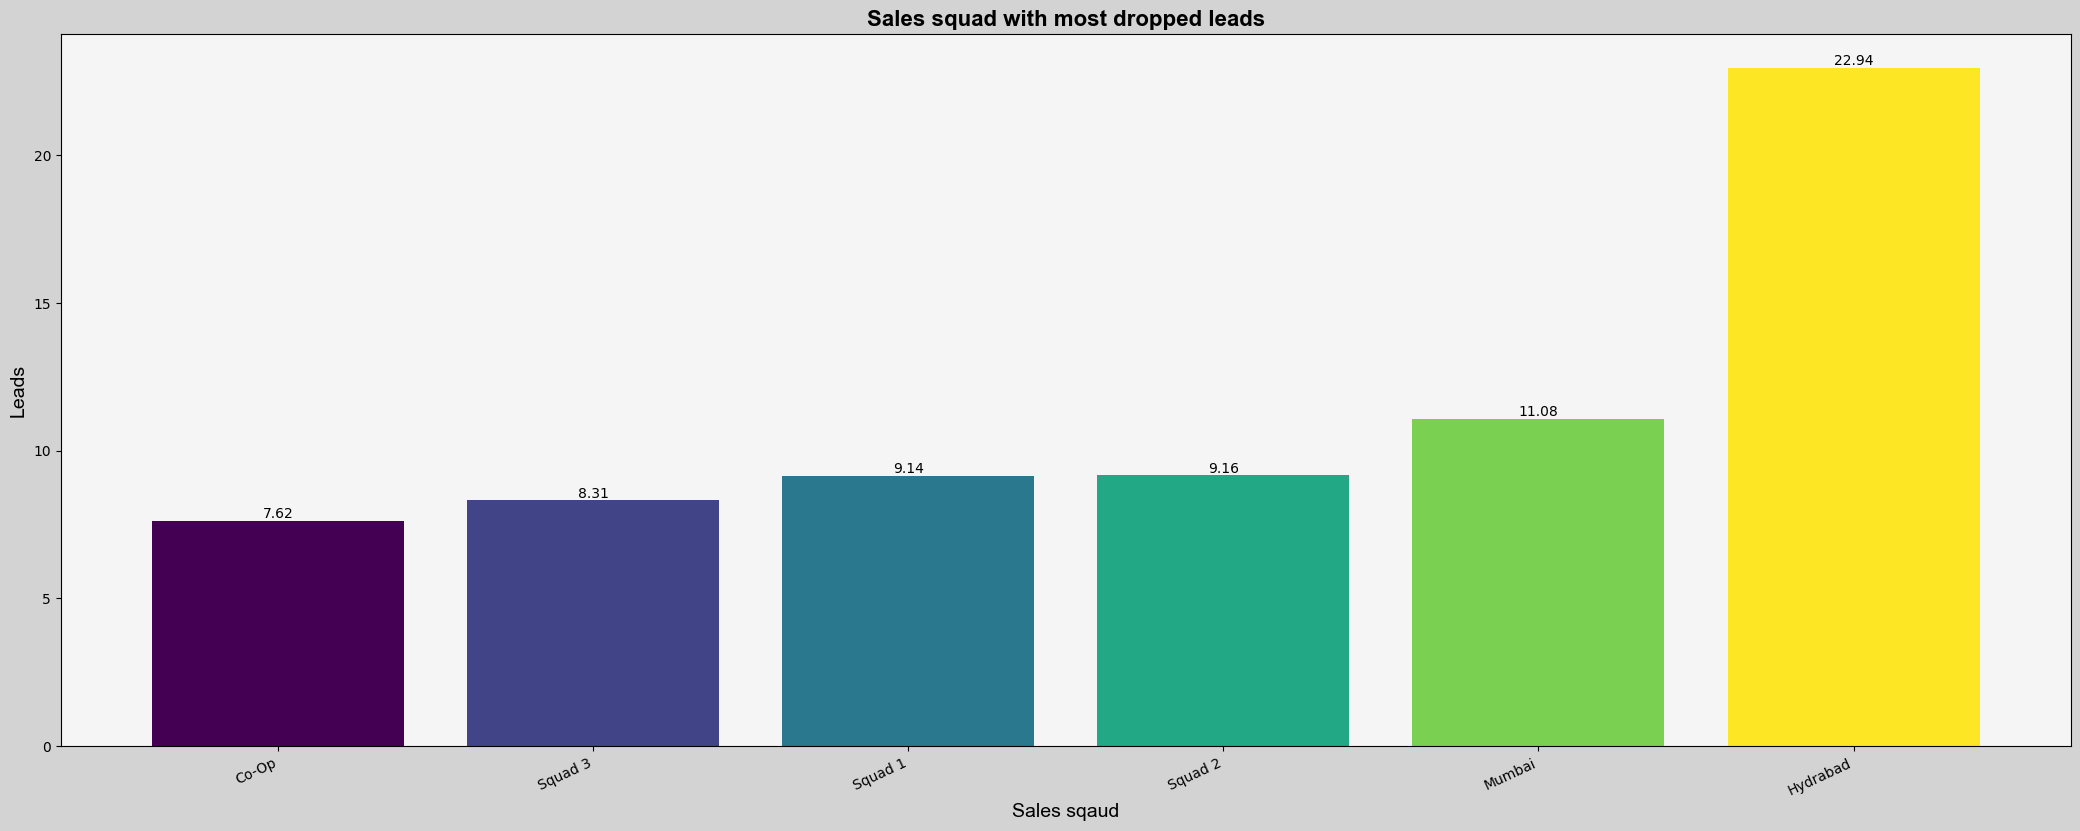

In [108]:
x=x.sort_values(by='dropped ratio')

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(right=1.8, top=1)
fig.patch.set_facecolor('lightgrey')
ax.set_facecolor('whitesmoke')

title_font = {'family': 'Arial', 'size': 16, 'weight': 'bold'}
label_font = {'family': 'Arial', 'size': 14}
ax.set_title('Sales squad with most dropped leads', fontdict=title_font)
ax.set_xlabel('Sales sqaud', fontdict=label_font)
ax.set_ylabel('Leads', fontdict=label_font)
viridis = plt.get_cmap('viridis', len(x))

bars = ax.bar(x=x['sales_squad'], height=x['dropped ratio'], color=viridis(range(len(x))))
plt.xticks(rotation=25, ha='right')

for i, v in enumerate(x['dropped ratio']):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=10, color='black')

In [109]:
usls_df['Campaign Name'].value_counts()

Campaign Name
USP_Video_APTLTSKA_Lead-Gen_Custom-intent_050324                                        4444
USP_2_Lead-gen-2_Top4-states_050424                                                     2440
USP_Program_More-Volume_No Logic_South-states_220124                                    2030
USP_Video_APTLTSKA_Lead-Gen_Websites_050324                                             1968
USP_Program_Lead-gen_4_MAR&MBA_140223                                                   1160
USP Masterclass Cold [ 23rd Nov ] - More volume - With Logic - India                    1068
USP_Program_More-volume_With-Logic_South-states_220124                                   959
USP_Program_More-volume_With-Logic_India_220124                                          928
xCBO - USP Masterclass Cold [ 23rd Nov ] - More Volume - No Logic - India-  new link     914
USP Masterclass Cold [ 31st Oct ] - More volume - With Logic                             654
USP_Video_APTLTSKA_Lead-Gen_160224                      

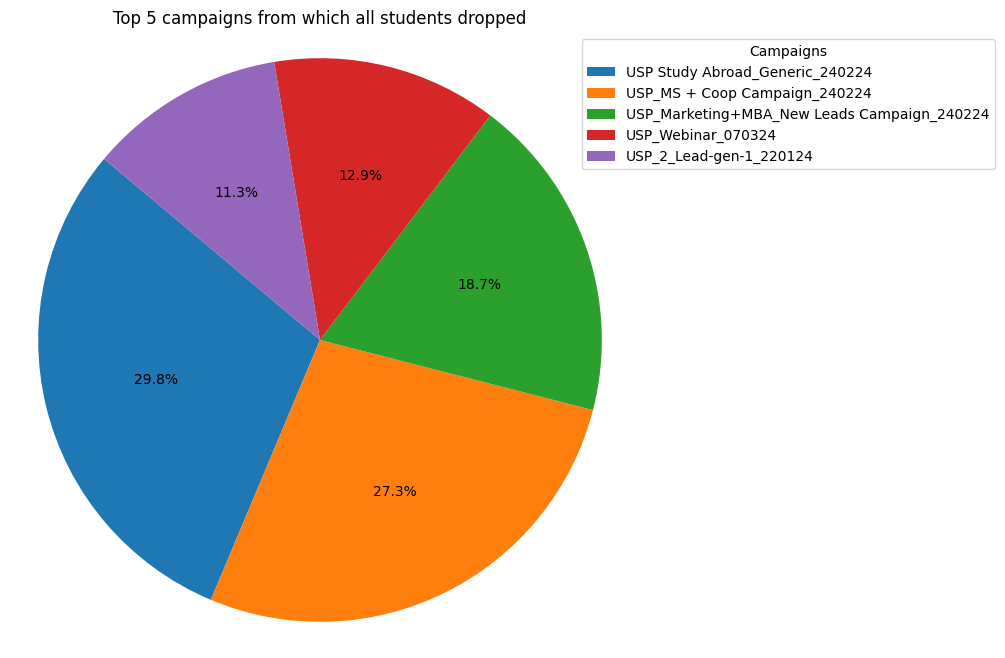

In [110]:
campaign_counts = df['Campaign Name'].value_counts().sort_values(ascending=False).head(5)
plt.figure(figsize=(8,8))
plt.pie(campaign_counts, autopct='%1.1f%%', startangle=140)
plt.legend(campaign_counts.index, title="Campaigns", loc='upper right', bbox_to_anchor=(1.6, 1.0))

plt.axis('equal')
plt.title('Top 5 campaigns from which all students dropped')
plt.show()

In [111]:
usls_df.tail()

,lead_number,first_name,Lead Id,inbound_phone_call_counter,outbound_phone_call_counter,lead_stage,lead_score,owner,activity,date_of_call,status,call_duration_sec,calls_done_by,contacted_x,call_time,sales_squad,squad_role,lead_id,created_time,Ad Name,Campaign Name,form_name,platform,graduation_degree,graduation_percentage,work_experience,mapped,contacted_y,lsq_lead_stage,lsq_lead_owner,lsq_source,derived_score
193279,878039,Shubham,l:891179695860682,0,18,Not Interested,0,Saket Rai,Outbound Phone Call Activity,2024-03-31 15:31:00,Answered,107,ArabindaPalai,NaN,2024-03-31 15:31:00,NaN,NaN,l:891179695860682,2023-12-10 03:59:00,#6 ( Graphic ) - Master's Degree In 12 Months,USP Masterclass Cold [ 23rd Nov ] - More volum...,BM - US pathway Webinar Form - More volume - W...,Facebook,B.Tech CSE,60.0,3.0,Mapped,Contacted,Not Interested,Saket Rai,Facebook,0.00
193281,855541,Saksham Arora,l:884039469946071,2,0,Not Interested,0,Sonu Mishra,Inbound Phone Call Activity,2024-02-18 17:42:00,Missed,0,SakshiThakur,NaN,2024-02-18 17:42:00,Squad 1,Agent,l:884039469946071,2023-11-24 10:40:00,#6 ( Graphic ) - Master's Degree In 12 Months,USP Masterclass Cold [ 23rd Nov ] - More volum...,BM - US pathway Webinar Form - More volume - W...,Facebook,"B.Tech (Civil, EEE, Mech. , etc.)",80.0,2.0,Mapped,Contacted,Never Picked up,Simran Rana,Facebook,0.25
193294,2269885,Hari Prasad,l:394442863046435,0,11,Counselling Booked,5,Ratnesh Mishra,Outbound Phone Call Activity,2024-02-11 16:17:00,NotAnswered,0,RatneshMishra,NaN,2024-02-11 16:17:00,Squad 1,Agent,l:394442863046435,2024-01-27 05:02:00,#6 ( Graphic ) - Master's Degree In 12 Months,USP_Program_More-Volume_No Logic_South-states_...,BM - US pathway Webinar Form - More Volume - N...,Facebook,Others,60.0,3.0,Mapped,Contacted,Document Collection,Swapnil Awasthi,Facebook,2.00
193303,746739,Geo Joy,l:384186234282920,0,5,Counselling Done,1,Abid Bhat,Outbound Phone Call Activity,2024-02-22 13:10:00,Answered,76,SakshiThakur,NaN,2024-02-22 13:10:00,Squad 1,Agent,l:384186234282920,2023-12-05 14:17:00,#6 ( Graphic ) - Master's Degree In 12 Months,xCBO - USP Masterclass Cold [ 23rd Nov ] - Mor...,BM - US pathway Webinar Form - More Volume - N...,Facebook,"B.Tech (Civil, EEE, Mech. , etc.)",60.0,4.0,Mapped,Contacted,Counselling Done,Abid Bhat,Facebook,1.50
193332,2295253,Sayeed,3bde18d0-c9dc-435c-9159-99ef220a14bd,0,6,New Enquiry,5,Fahim Moshin Shaikh,Outbound Phone Call Activity,2024-03-10 14:07:00,NotAnswered,27,Fahim MoshinShaikh,NaN,2024-03-10 14:07:00,Squad 1,Agent,3bde18d0-c9dc-435c-9159-99ef220a14bd,2024-03-05 18:35:29,RG Video,USP_Video_APTLTSKA_Lead-Gen_160224,NaN,Google,"B.Tech (Civil, ME, ECE, EEE etc.)",60.0,-1.0,Mapped,Contacted,New Enquiry,yashi tiwari,GoogleAds,1.50


In [135]:
x = usls_df.groupby('platform')['Lead Id'].count().reset_index()

In [136]:
x = x.rename(columns={'Lead Id' : 'leads dropped'})
x

,platform,leads dropped
0,Facebook,10153
1,Google,7350
2,LinkedIn,273


In [138]:
for idx, row in x.iterrows():
    ct = len(df[df['platform'] == row['platform']])
    x.loc[x['platform'] == row['platform'], 'total leads'] = ct

In [139]:
x['dropped ratio'] = (x['leads dropped'] / x['total leads']) * 100

In [140]:
x

,platform,leads dropped,total leads,dropped ratio
0,Facebook,10153,161079.0,6.303118
1,Google,7350,13494.0,54.468653
2,LinkedIn,273,18786.0,1.453210


## Don't trust Google leads 👀

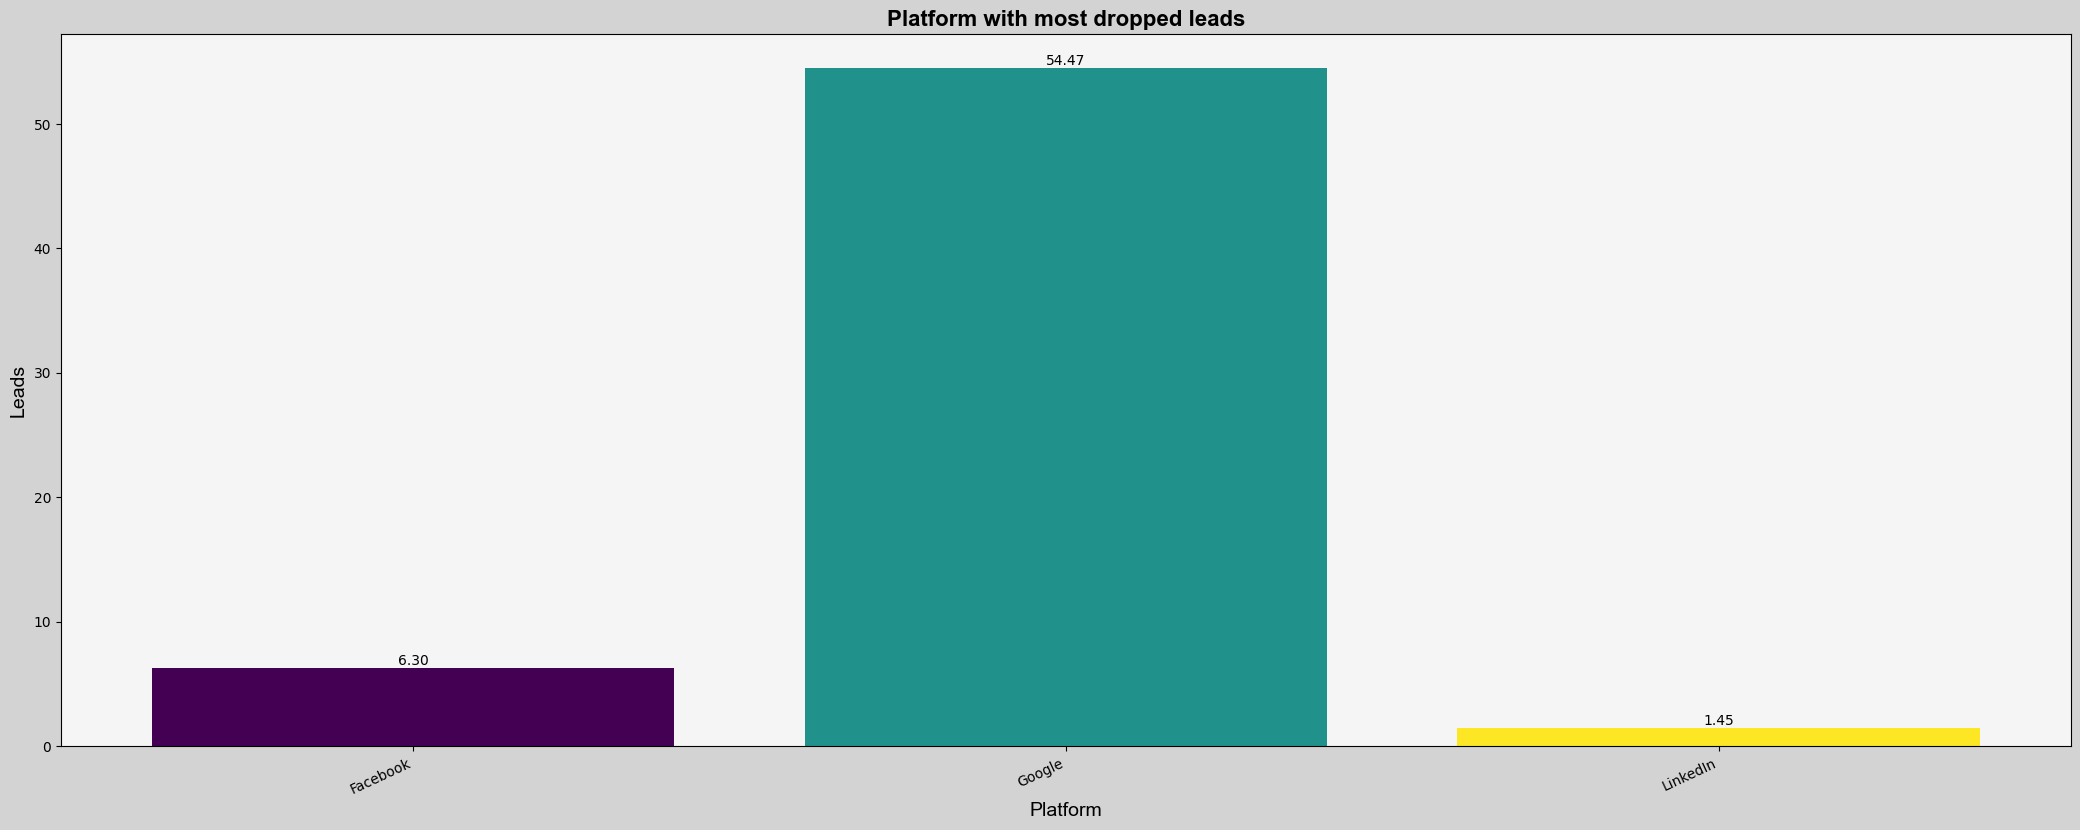

In [117]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(right=1.8, top=1)
fig.patch.set_facecolor('lightgrey')
ax.set_facecolor('whitesmoke')

title_font = {'family': 'Arial', 'size': 16, 'weight': 'bold'}
label_font = {'family': 'Arial', 'size': 14}
ax.set_title('Platform with most dropped leads', fontdict=title_font)
ax.set_xlabel('Platform', fontdict=label_font)
ax.set_ylabel('Leads', fontdict=label_font)
viridis = plt.get_cmap('viridis', len(x))

bars = ax.bar(x=x['platform'], height=x['dropped ratio'], color=viridis(range(len(x))))
plt.xticks(rotation=25, ha='right')

for i, v in enumerate(x['dropped ratio']):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=10, color='black')

In [118]:
len(fdf)

3641

In [119]:
fdf.head(1)

,lead_number,first_name,Lead Id,inbound_phone_call_counter,outbound_phone_call_counter,lead_stage,lead_score,owner,activity,date_of_call,status_x,call_duration_sec,calls_done_by,contacted_x,call_time,sales_squad,squad_role,lead_id,created_time,Ad Name,Campaign Name,form_name,platform,graduation_degree,graduation_percentage,work_experience,mapped,contacted_y,lsq_lead_stage,lsq_lead_owner,lsq_source,derived_score,Name,Lead ID,created_date,paid_date,cohort,source,agent,counsellor,prospect_id,status_y,Candidate Name,Counselor Name,Block Amount Received Date,Univ. Pitched,Candidate Preferred College #1,Candidate Preferred College #2,10th Percentage,12th Percentage,UG - CGPA (out of 10),GPA (Out of 4),PG - CGPA or %,Work Exp.,Highest Education,Designation - Company Name,Candidate Application Status,Candidate Loan Status,Remarks - General,Reason for dropping,"If dropped, mention stage of the application",,KYC & Acad Documents Received,Tech Exam Scores,Coding Test Score,English Exam Scores,Exam Taking Date,English Interview Score (15),Tech. interview Score (10),.1,Application Type,Intake Status,.2,Choice of School #1,Choice of Program #1,Passport #1,Resume #1,Degree #1,Transcript #1,Application Fee #1,LOR #1,SOP #1,Pending Stage #1,Application Status #1,Application Initation Date #1,App Partially Submitted Date #1,Application Submission Date #1,Offer Letter #1,Offer Letter Provision Date #1,Deposit #1,Deposit Date Paid #1,.3,Choice of School #2,Choice of Program #2,Application Fee #2,LOR #2,SOP #2,Pending Stage #2,Application Status #2,Application Initation Date #2,App Partially Submitted Date #2,Application Submission Date #2,Offer Letter #2,Offer Letter Provision Date #2,Deposit #2,Deposit Date Paid #2,.4,Choice of School #3,Choice of Program #3,Application Fee #3,LOR #3,SOP #3,Pending Stage #3,Application Status #3,Application Initation Date #3,App Partially Submitted Date #3,Application Submission Date #3,Offer Letter #3,Offer Letter Provision Date #3,Deposit #3,Deposit Date Paid #3,Remarks #3 (If Rejected),.5,Choice of School #4,Choice of Program #4,Application Fee #4,LOR #4,SOP #4,Pending Stage #4,Application Status #4,Application Initation Date #4,App Partially Submitted Date #4,Application Submission Date #4,Offer Letter #4,Offer Letter Provision Date #4,Deposit #4,Deposit Date Paid #4,Remarks #4 (If Rejected),.6,Choice of School #5,Choice of Program #5,Application Fee #5,LOR #5,SOP #5,Pending Stage #5,Application Status #5,Application Initation Date #5,App Partially Submitted Date #5,Application Submission Date #5,Offer Letter #5,Offer Letter Provision Date #5,Deposit #5,Deposit Date Paid #5,Remarks #5 (If Rejected),.7,IIM / IIT Status,Loan Status,Loan Partner I,Loan Partner II,Loan Application Submit Date,Existing Loan,CIBIL SCORE,No. of defaults,.8,Aadhar Card,PAN Card,Passport,CV/Resume,CIBIL Score,Bank Statement (Savings - 6mo),Affidavit Letter,Sponsorship Letter,Offer Letter,Offer Letter Submission Date,.9,Financials Submission,Financials Submission Date,i20 Provisioned,i20 Provisioned Date,Remarks,Status,SOP Status,.10,is_dropped,days_to_pay,Pitched Preferred Univ
0,2704878,Pranav,l:861701659054416,3,0,Token Amount,1,Ratnesh Mishra,Inbound Phone Call Activity,2024-04-16 16:29:00,Answered,232,SuryanshTiwari,NaN,2024-04-16 16:29:00,Squad 3,Agent,l:861701659054416,2024-03-29 05:37:00,USP_Webinar_MSunder12Months,USP_Webinar_070324,BM - US pathway Webinar Form - More Volume - N...,Facebook,Others,60,0,Mapped,Contacted,Application Submitted,Ratnesh Mishra,Zoom Webinar,2.5,Pranav,l:861701659054416,2024-03-30,2024-04-14,Cohort 2,Zoom Webinar,Ratnesh Mishra,Shashwat,0181dce5-7a90-4d3f-b832-aee660d2aeb5,ACTIVE TOKEN,Pranav,Shashwat Shourya,2024-04-14 00:00:00,NaN,"University at Buffalo (SUNY), School of Manage...",DePaul Kellstadt Graduate School of Business,88.18,80.3375,7.01,2.8,6.0,6.0,M.com,Senior Analyst - AXA Business Services PVT. LTD,Candidate Deferred to next intake,Candidate Deferred to next intake,DePaul submitted on 2

In [120]:
fdf.loc[:, 'total calls'] = fdf['inbound_phone_call_counter'] + fdf['outbound_phone_call_counter']

In [121]:
fdf['total calls'].value_counts()

total calls
20    636
3     482
5     139
2     132
13    130
     ... 
70      1
64      1
87      1
58      1
53      1
Name: count, Length: 68, dtype: int64

In [122]:
bins = range(0, 640, 80)
labels = [f"{i}-{i+80}" for i in bins[:-1]]

<Figure size 1200x600 with 0 Axes>

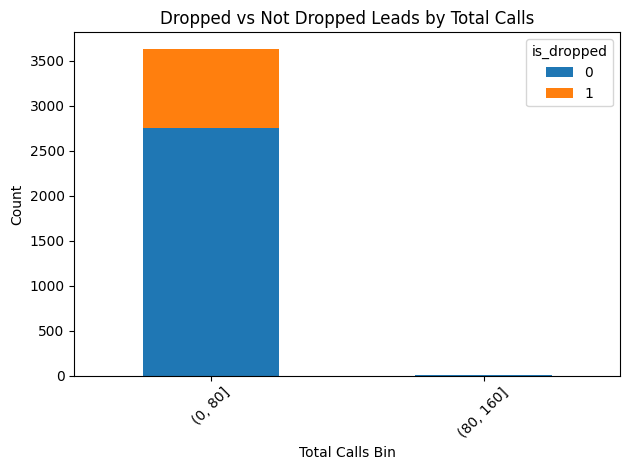

In [123]:
fdf['total_calls_bin'] = pd.cut(fdf['total calls'], bins=range(0, fdf['total calls'].max() + 80, 80))

# Create a pivot table to count dropped and not dropped leads by bin
pivot_table = fdf.pivot_table(index='total_calls_bin', columns='is_dropped', values='Lead Id', aggfunc='count', observed=False)

# Plot the results
plt.figure(figsize=(12, 6))
pivot_table.plot(kind='bar', stacked=True)
plt.xticks(rotation=45)
plt.xlabel('Total Calls Bin')
plt.ylabel('Count')
plt.title('Dropped vs Not Dropped Leads by Total Calls')
plt.tight_layout()
plt.show()

In [124]:
(fdf[fdf['total calls'] <= 80]['inbound_phone_call_counter'].value_counts())

inbound_phone_call_counter
0     2614
3      421
2       76
4       68
1       64
5       59
9       48
6       42
7       42
11      23
29      20
13      20
12      18
16      16
8       14
10      14
15      12
34       8
32       7
18       6
14       5
35       5
28       4
26       4
20       4
23       3
22       3
17       3
37       2
24       2
38       2
19       2
25       2
21       1
Name: count, dtype: int64

In [125]:
fdf['total calls'].value_counts()

total calls
20    636
3     482
5     139
2     132
13    130
     ... 
70      1
64      1
87      1
58      1
53      1
Name: count, Length: 68, dtype: int64

In [126]:
(fdf['total calls'] == 0).any()

np.False_

In [127]:
fdf[(fdf['inbound_phone_call_counter'] == 0) & (fdf['outbound_phone_call_counter'] == 0)]

,lead_number,first_name,Lead Id,inbound_phone_call_counter,outbound_phone_call_counter,lead_stage,lead_score,owner,activity,date_of_call,status_x,call_duration_sec,calls_done_by,contacted_x,call_time,sales_squad,squad_role,lead_id,created_time,Ad Name,Campaign Name,form_name,platform,graduation_degree,graduation_percentage,work_experience,mapped,contacted_y,lsq_lead_stage,lsq_lead_owner,lsq_source,derived_score,Name,Lead ID,created_date,paid_date,cohort,source,agent,counsellor,prospect_id,status_y,Candidate Name,Counselor Name,Block Amount Received Date,Univ. Pitched,Candidate Preferred College #1,Candidate Preferred College #2,10th Percentage,12th Percentage,UG - CGPA (out of 10),GPA (Out of 4),PG - CGPA or %,Work Exp.,Highest Education,Designation - Company Name,Candidate Application Status,Candidate Loan Status,Remarks - General,Reason for dropping,"If dropped, mention stage of the application",,KYC & Acad Documents Received,Tech Exam Scores,Coding Test Score,English Exam Scores,Exam Taking Date,English Interview Score (15),Tech. interview Score (10),.1,Application Type,Intake Status,.2,Choice of School #1,Choice of Program #1,Passport #1,Resume #1,Degree #1,Transcript #1,Application Fee #1,LOR #1,SOP #1,Pending Stage #1,Application Status #1,Application Initation Date #1,App Partially Submitted Date #1,Application Submission Date #1,Offer Letter #1,Offer Letter Provision Date #1,Deposit #1,Deposit Date Paid #1,.3,Choice of School #2,Choice of Program #2,Application Fee #2,LOR #2,SOP #2,Pending Stage #2,Application Status #2,Application Initation Date #2,App Partially Submitted Date #2,Application Submission Date #2,Offer Letter #2,Offer Letter Provision Date #2,Deposit #2,Deposit Date Paid #2,.4,Choice of School #3,Choice of Program #3,Application Fee #3,LOR #3,SOP #3,Pending Stage #3,Application Status #3,Application Initation Date #3,App Partially Submitted Date #3,Application Submission Date #3,Offer Letter #3,Offer Letter Provision Date #3,Deposit #3,Deposit Date Paid #3,Remarks #3 (If Rejected),.5,Choice of School #4,Choice of Program #4,Application Fee #4,LOR #4,SOP #4,Pending Stage #4,Application Status #4,Application Initation Date #4,App Partially Submitted Date #4,Application Submission Date #4,Offer Letter #4,Offer Letter Provision Date #4,Deposit #4,Deposit Date Paid #4,Remarks #4 (If Rejected),.6,Choice of School #5,Choice of Program #5,Application Fee #5,LOR #5,SOP #5,Pending Stage #5,Application Status #5,Application Initation Date #5,App Partially Submitted Date #5,Application Submission Date #5,Offer Letter #5,Offer Letter Provision Date #5,Deposit #5,Deposit Date Paid #5,Remarks #5 (If Rejected),.7,IIM / IIT Status,Loan Status,Loan Partner I,Loan Partner II,Loan Application Submit Date,Existing Loan,CIBIL SCORE,No. of defaults,.8,Aadhar Card,PAN Card,Passport,CV/Resume,CIBIL Score,Bank Statement (Savings - 6mo),Affidavit Letter,Sponsorship Letter,Offer Letter,Offer Letter Submission Date,.9,Financials Submission,Financials Submission Date,i20 Provisioned,i20 Provisioned Date,Remarks,Status,SOP Status,.10,is_dropped,days_to_pay,Pitched Preferred Univ,total calls,total_calls_bin


In [128]:
fdf = fdf.drop('total_calls_bin', axis=1)

In [129]:
fdf.head()

,lead_number,first_name,Lead Id,inbound_phone_call_counter,outbound_phone_call_counter,lead_stage,lead_score,owner,activity,date_of_call,status_x,call_duration_sec,calls_done_by,contacted_x,call_time,sales_squad,squad_role,lead_id,created_time,Ad Name,Campaign Name,form_name,platform,graduation_degree,graduation_percentage,work_experience,mapped,contacted_y,lsq_lead_stage,lsq_lead_owner,lsq_source,derived_score,Name,Lead ID,created_date,paid_date,cohort,source,agent,counsellor,prospect_id,status_y,Candidate Name,Counselor Name,Block Amount Received Date,Univ. Pitched,Candidate Preferred College #1,Candidate Preferred College #2,10th Percentage,12th Percentage,UG - CGPA (out of 10),GPA (Out of 4),PG - CGPA or %,Work Exp.,Highest Education,Designation - Company Name,Candidate Application Status,Candidate Loan Status,Remarks - General,Reason for dropping,"If dropped, mention stage of the application",,KYC & Acad Documents Received,Tech Exam Scores,Coding Test Score,English Exam Scores,Exam Taking Date,English Interview Score (15),Tech. interview Score (10),.1,Application Type,Intake Status,.2,Choice of School #1,Choice of Program #1,Passport #1,Resume #1,Degree #1,Transcript #1,Application Fee #1,LOR #1,SOP #1,Pending Stage #1,Application Status #1,Application Initation Date #1,App Partially Submitted Date #1,Application Submission Date #1,Offer Letter #1,Offer Letter Provision Date #1,Deposit #1,Deposit Date Paid #1,.3,Choice of School #2,Choice of Program #2,Application Fee #2,LOR #2,SOP #2,Pending Stage #2,Application Status #2,Application Initation Date #2,App Partially Submitted Date #2,Application Submission Date #2,Offer Letter #2,Offer Letter Provision Date #2,Deposit #2,Deposit Date Paid #2,.4,Choice of School #3,Choice of Program #3,Application Fee #3,LOR #3,SOP #3,Pending Stage #3,Application Status #3,Application Initation Date #3,App Partially Submitted Date #3,Application Submission Date #3,Offer Letter #3,Offer Letter Provision Date #3,Deposit #3,Deposit Date Paid #3,Remarks #3 (If Rejected),.5,Choice of School #4,Choice of Program #4,Application Fee #4,LOR #4,SOP #4,Pending Stage #4,Application Status #4,Application Initation Date #4,App Partially Submitted Date #4,Application Submission Date #4,Offer Letter #4,Offer Letter Provision Date #4,Deposit #4,Deposit Date Paid #4,Remarks #4 (If Rejected),.6,Choice of School #5,Choice of Program #5,Application Fee #5,LOR #5,SOP #5,Pending Stage #5,Application Status #5,Application Initation Date #5,App Partially Submitted Date #5,Application Submission Date #5,Offer Letter #5,Offer Letter Provision Date #5,Deposit #5,Deposit Date Paid #5,Remarks #5 (If Rejected),.7,IIM / IIT Status,Loan Status,Loan Partner I,Loan Partner II,Loan Application Submit Date,Existing Loan,CIBIL SCORE,No. of defaults,.8,Aadhar Card,PAN Card,Passport,CV/Resume,CIBIL Score,Bank Statement (Savings - 6mo),Affidavit Letter,Sponsorship Letter,Offer Letter,Offer Letter Submission Date,.9,Financials Submission,Financials Submission Date,i20 Provisioned,i20 Provisioned Date,Remarks,Status,SOP Status,.10,is_dropped,days_to_pay,Pitched Preferred Univ,total calls
0,2704878,Pranav,l:861701659054416,3,0,Token Amount,1,Ratnesh Mishra,Inbound Phone Call Activity,2024-04-16 16:29:00,Answered,232,SuryanshTiwari,NaN,2024-04-16 16:29:00,Squad 3,Agent,l:861701659054416,2024-03-29 05:37:00,USP_Webinar_MSunder12Months,USP_Webinar_070324,BM - US pathway Webinar Form - More Volume - N...,Facebook,Others,60,0,Mapped,Contacted,Application Submitted,Ratnesh Mishra,Zoom Webinar,2.50,Pranav,l:861701659054416,2024-03-30,2024-04-14,Cohort 2,Zoom Webinar,Ratnesh Mishra,Shashwat,0181dce5-7a90-4d3f-b832-aee660d2aeb5,ACTIVE TOKEN,Pranav,Shashwat Shourya,2024-04-14 00:00:00,NaN,"University at Buffalo (SUNY), School of Manage...",DePaul Kellstadt Graduate School of Business,88.180000,80.3375,7.01,2.80,6.0,6.0,M.com,Senior Analyst - AXA Business Services PVT. LTD,Candidate Deferred to next intake,Candidate Deferred to next intake,DeP

<Figure size 1000x600 with 0 Axes>

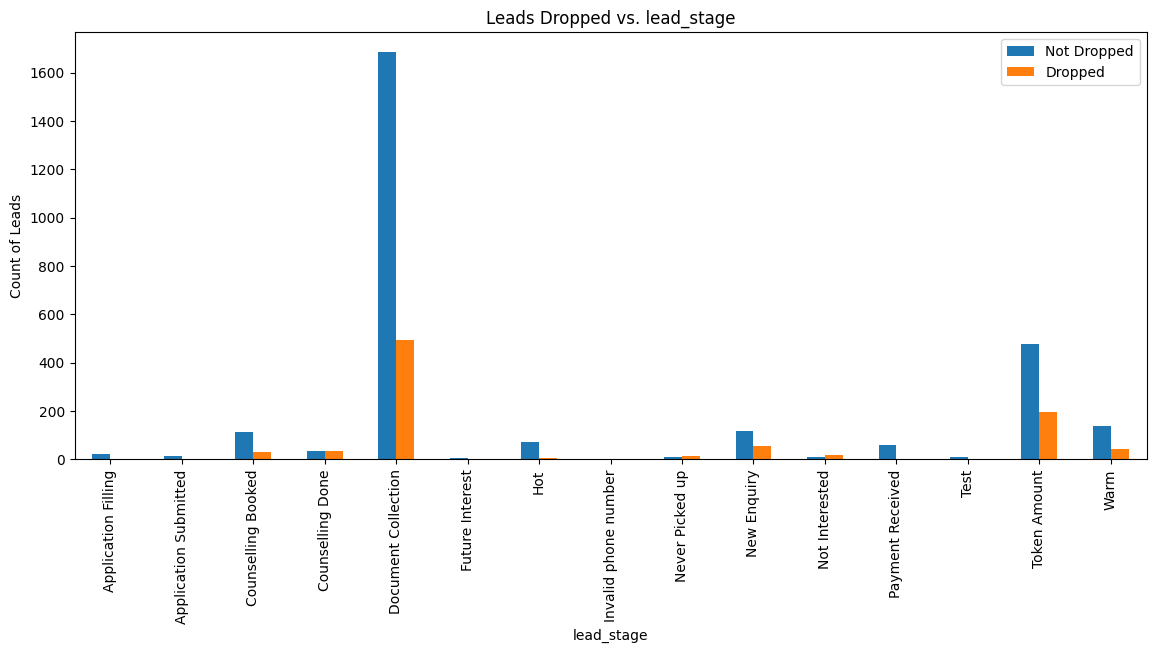

In [130]:
grouped = fdf.groupby(['lead_stage', 'is_dropped']).size().reset_index(name='count')

pivot_df = grouped.pivot(index='lead_stage', columns='is_dropped', values='count').fillna(0)
plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked=False)
plt.subplots_adjust(right=1.8, top=1)
plt.title('Leads Dropped vs. lead_stage')
plt.xlabel('lead_stage')
plt.ylabel('Count of Leads')
plt.legend(labels=['Not Dropped', 'Dropped'])
plt.show()

In [132]:
x = fdf.groupby(['lead_stage', 'is_dropped'])['total calls']

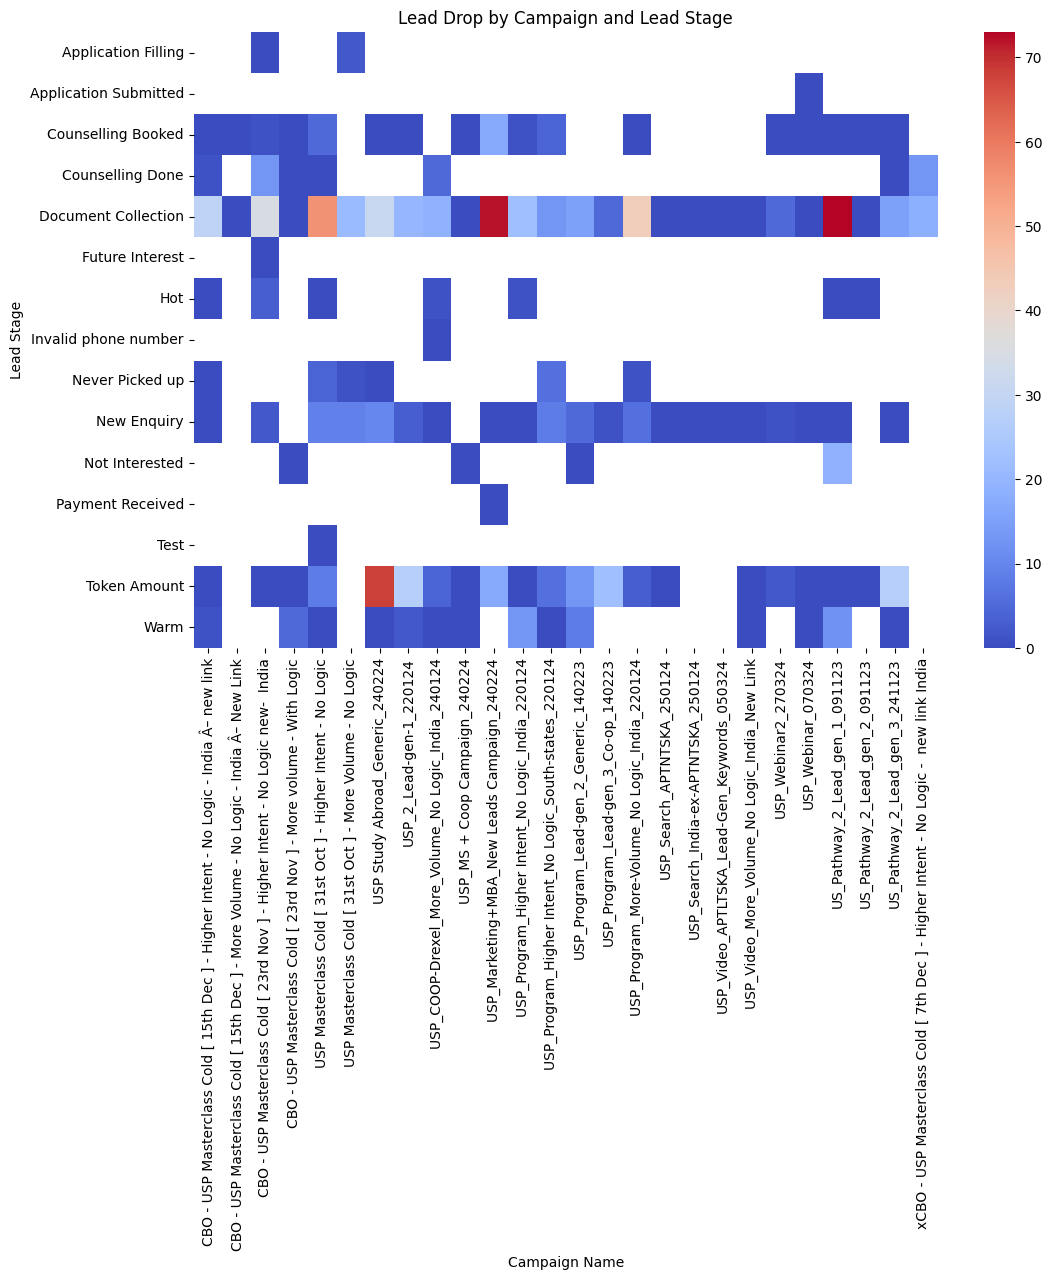

In [155]:

grouped_data = fdf.groupby(['Campaign Name', 'lead_stage'])['is_dropped'].sum().reset_index(name='dropped_count')
pivot_table = grouped_data.pivot_table(index='lead_stage', columns='Campaign Name', values='dropped_count')
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, fmt='d', cmap='coolwarm')
plt.title('Lead Drop by Campaign and Lead Stage')
plt.xlabel('Campaign Name')
plt.ylabel('Lead Stage')
plt.show()
